# Train-Test Split 

This train-test split adopts the method of TESSERACT to preserve time consistency so as to overcome the temporal bias that occurs in training on future data and testing on past data.

TESSERACT advocates for training on past data and testing on future data to mirror actual deployment scenarios.

We adopt and extend this method.

In [ ]:
# import 
# you may not need to run this cell, you can just run the next cell
import sys
sys.path.append('/mnt/storage/faithfulco/tesseract_env')

In [ ]:
# libraries
import sys
import os
import json
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt

In [4]:
df_mlran_meta = pd.read_csv('FS_MLRan_Datasets/mlran_dataset_metadata.csv')
df_mlran_meta.head()

,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,source,timestamp,new_timestamp,old_timestamp,Year,first_submission_date,first_submission_date_converted,first_submission_date_year
0,10001,0068712434bda717df0d783b560b312854cb7dd4cf0789...,1,cryptolocker,3,crypto,2,77d6871f350be911b2b5c3e16cc2c222c1887779,12be6e7241d2503f31fae01046e88d68,exe,30/56,elderan,2014:10:10,2014-10-10,2014:10:10,2014,1413149304,2014-10-12,2014
1,10002,00735e4ad3e9a9a5b3551dce371248327e74ef3c25edca...,1,cryptowall,12,crypto,2,96fb7d2e3ad9fe434a66abb15b26dd4e40aa5d4b,aea8ab12edf294ddb2804d6618fdd247,exe,44/55,elderan,2015:04:02,2015-04-02,2015:04:02,2015,1428563179,2015-04-09,2015
2,10003,007a81ed76ca6d6e10584d90dee399b4ab98e59707688c...,1,cryptolocker,3,crypto,2,8ecc04ce43c0c77978fa83169819e37a92110318,d5d010f8b2f145399a9638f457ff3990,exe,28/52,elderan,2014:01:29,2014-01-29,2014:01:29,2014,1401330145,2014-05-29,2014
3,10004,00bf847c9a53922a2b36348456ee0f1afff0eec705f221...,1,kovter,9,locker,1,0d9e3696c8516a89567ef712c612edacc3c3386b,d1510b299e8570afd352d20d516f6f48,exe,28/57,elderan,2015:08:09,2015-08-09,2015:08:09,2015,1439196631,2015-08-10,2015
4,10005,00d786974e609adf93b29e6e86f7439074149e6cceabf3...,1,matsnu,11,locker,1,b1e88afcd0ea38655005eb4a6247ce9355b518ba,bc5734bcc7e2d8e2e208ea483a09b158,zip,42/55,elderan,1992:06:19,1992-06-19,NaN,1992,1416574498,2014-11-21,2014


In [5]:
df_mlran_meta.shape

(4884, 19)

In [6]:
sample_type_counts = df_mlran_meta.sample_type.value_counts()

# Calculate percentage for each class
sample_type_percentage = (sample_type_counts / len(df_mlran_meta)) * 100
test_count = (sample_type_counts*0.2).round()
train_count = sample_type_counts - test_count

sample_type_percentage_df = pd.DataFrame({"Count": sample_type_counts, "Percentage (%)": sample_type_percentage.round(2), "Test Count(20%)": test_count, "Train Count(80%)": train_count})     
sample_type_percentage_df

,Count,Percentage (%),Test Count(20%),Train Count(80%)
sample_type,,,,
0,2550,52.21,510.0,2040.0
1,2334,47.79,467.0,1867.0


## Goodware Samples Train-Test Split

In [7]:
df_mlran_meta_goodware = df_mlran_meta[df_mlran_meta['sample_type'] == 0]
print("Goodware Shape: ", df_mlran_meta_goodware.shape)
display(df_mlran_meta_goodware.head())
display(df_mlran_meta_goodware.tail())

Goodware Shape:  (2550, 19)


,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,source,timestamp,new_timestamp,old_timestamp,Year,first_submission_date,first_submission_date_converted,first_submission_date_year
2334,13001,6bf745bef827265696716ba910fd319b31c7f7377f1efa...,0,goodware,0,goodware,0,3b791ee176ad1d0a7957538d4d4aaf40008ed24e,8d7f98d5b2f8ccc2a49b4867f272f0c2,exe,0/77,software_informer_most_popular,1304119657.0,2011-04-29,1304119657.0,2011,1346054900,2012-08-27,2012
2335,13002,8e03d21037a245bb0567a13d8cd87c1d72dc2095758a64...,0,goodware,0,goodware,0,299d6611d0d7a69c1d47abf7a1dfca53b538ee38,6997bdec840b3d2bfaf4c52368a20432,exe,0/75,software_informer_most_popular,1270901978.0,2010-04-10,1270901978.0,2010,1325735427,2012-01-05,2012
2336,13003,3351b2b19b555a2cfce01090797637435cbe4109adb037...,0,goodware,0,goodware,0,ed83d911fff891832a3b0ae31f99cf85bdd46762,dcf5ac41204864216b005ba522938ca7,exe,0/78,software_informer_most_popular,1676472856.0,2023-02-15,1676472856.0,2023,1714184861,2024-04-27,2024
2337,13004,10c81f8e5ec130ff5dfee4f0e88a4beb0dbc300eb5d17d...,0,goodware,0,goodware,0,6df219034791959bc9e721266d7fa12ea3c71147,6b4d1e3b2f1d03b53f6240b5f87462df,exe,0/77,software_informer_most_popular,1456151781.0,2016-02-22,1456151781.0,2016,1456923987,2016-03-02,2016
2338,13005,4c358636c51770d9080458d59373feb8dd5a74acb752d8...,0,goodware,0,goodware,0,0a4678ac2fe206d833eeef9e2260b3d9e404dcb9,86790cda8224f8bd67f527d43cb85727,exe,0/77,software_informer_most_popular,1168712776.0,2007-01-13,1168712776.0,2007,1185699926,2007-07-29,2007


,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,source,timestamp,new_timestamp,old_timestamp,Year,first_submission_date,first_submission_date_converted,first_submission_date_year
4879,15691,94aaabcc6c08fbab44d0efaa5523d50d5f79b27d241cd8...,0,goodware,0,goodware,0,50dca602bc4b1b9b4e2e9447a78e867132a7d67b,03a9fc2997268ebbce2df67e8491b09f,exe,0/78,software_informer_lifestyle,1004039231.0,2001-10-25,1004039231.0,2001,1602768092,2020-10-15,2020
4880,15692,f900248973476082f4401339d542e025759b4b71673a23...,0,goodware,0,goodware,0,bced6159e0aa1cbf8a115b2b9a33c9f8df72ce5c,26de8b100eb8cf8496441f1173d85cce,exe,0/75,software_informer_lifestyle,1441778346.0,2015-09-09,1441778346.0,2015,1568049131,2019-09-09,2019
4881,15693,aa8f912ca39da2c5190539e41d750241c6b1188ed54995...,0,goodware,0,goodware,0,93d50c493b4c4ea453dfeca4bf663064518efec7,45a879c17b23564b316f0c2879d7951b,zip,0/75,software_informer_lifestyle,708992537.0,1992-06-19,NaN,1992,1421996992,2015-01-23,2015
4882,15694,5a079d94050ae1f8c8eba86dce3802392a3ab2bd0c7b4a...,0,goodware,0,goodware,0,82ad47326b89c364806350e8ae954021aefce734,abae795d3259f6cb0dc0033d7793c4f9,msi,0/76,software_informer_lifestyle,1260532064.0,2009-12-11,1260532064.0,2009,1452798494,2016-01-14,2016
4883,15695,0dc88f85c0bd3cce1440d533053d667f2ef36d9ebda473...,0,goodware,0,goodware,0,b09baa4bf1242080b45b72aa9e46fbbe43f5ba98,6e531ff0e122e11240e224391efd5e64,exe,0/78,software_informer_lifestyle,1239828229.0,2009-04-15,1239828229.0,2009,1419903596,2014-12-30,2014


In [8]:
# Sort DataFrame by 'first_submission_date_converted' in ascending order
df_goodware_sorted = df_mlran_meta_goodware.sort_values(by='first_submission_date_converted')

# Reset index after sorting
df_goodware_sorted.reset_index(drop=True, inplace=True)

# Display sorted DataFrame
display(df_goodware_sorted)

,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,source,timestamp,new_timestamp,old_timestamp,Year,first_submission_date,first_submission_date_converted,first_submission_date_year
0,15141,dd7bec2877635f14d20fb71ce2d31baae527704c0560cf...,0,goodware,0,goodware,0,d333279f5779a3c8e04e0ff81d6a5ad89dab18b3,99f18d6e79fcca0d7f1ed8f457e23a0a,exe,0/78,software_informer_productivity,708992537.0,1992-06-19,708992537.0,1992,1162438526,2006-11-02,2006
1,13905,6ac7576c0b48ddee292f85724c7917e11360927ff8e5c5...,0,goodware,0,goodware,0,12a56f13da5f4b7b8b4390174d780157d08129a9,362feb532129fc33a0405786cab9847d,exe,0/78,software_informer_most_popular,939206019.0,1999-10-06,939206019.0,1999,1163659652,2006-11-16,2006
2,14531,150eb83ef1718b33e54bec3dac21520a5a5c0e2b1f184f...,0,goodware,0,goodware,0,436ea23892049e18968cc50aa64c17985ca330cf,4dbab349bf02d286a16dac9a1a00d622,exe,0/78,software_informer_developer_tools,939206019.0,1999-10-06,939206019.0,1999,1165574279,2006-12-08,2006
3,14502,db526af11e1e5c5d7147e202b9e03af0531d1f75501d7c...,0,goodware,0,goodware,0,b1cbabe096be992d1835928f716fee275a7b2ee5,1bda64a39215c214c8d6b4da34f3b28c,exe,0/78,software_informer_developer_tools,934563159.0,1999-08-13,934563159.0,1999,1170091816,2007-01-29,2007
4,15584,8739c76e681f900923b900c9df0ef75cf421d39cabb546...,0,goodware,0,goodware,0,b04f3ee8f5e43fa3b162981b50bb72fe1acabb33,76cdb2bad9582d23c1f6f4d868218d6c,zip,0/79,software_informer_lifestyle,708992537.0,1992-06-19,NaN,1992,1170892383,2007-02-07,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,15553,7f1c975cedcf35626cff5985eb131ac044e75beaf7be67...,0,goodware,0,goodware,0,c3ab9fffb71872cb5ec3d50101702066b9a4fcf4,1f43cdba44efcecf923b6d0ebef2557e,zip,0/79,software_informer_lifestyle,708992537.0,1992-06-19,NaN,1992,1719436885,2024-06-26,2024
2546,15343,ba5278ab35b0ab41d8493ca6e42bba4a7961c049892a37...,0,goodware,0,goodware,0,05792950217ac1cf282fffe83b198a808e17a8ca,f9242401e79340b8e4b802eb276185c7,exe,0/78,software_informer_business,708992537.0,1992-06-19,708992537.0,1992,1719715171,2024-06-30,2024
2547,15020,a5d997857ff5f3c2b3607a24a0eb4cc968a828029ac9b2...,0,goodware,0,goodware,0,912423a32574eebb590a57198c1651a36518fbf4,4aab36f9c0f7a0c76084eff10d853191,exe,0/79,software_informer_productivity,1719563365.0,2024-06-28,1719563365.0,2024,1720377547,2024-07-07,2024
2548,14359,1c9128a9a2e3023c60ed5972a0d18a45fff49efcabeb0c...,0,goodware,0,goodware,0,f055d794d040b09aa0b851b792afbed5d43cd07e,fdca044bdcbcf612821344359ead1e83,exe,0/79,software_informer_system_tools,1719563365.0,2024-06-28,1719563365.0,2024,1720505783,2024-07-09,2024


In [9]:
test_goodware = df_goodware_sorted.tail(510)

# Display the result
print("Test Goodware Shape: ", test_goodware.shape)
display(test_goodware)

Test Goodware Shape:  (510, 19)


,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,source,timestamp,new_timestamp,old_timestamp,Year,first_submission_date,first_submission_date_converted,first_submission_date_year
2040,13541,91cf6deb0b743388e7660c0d6bec2fd14037179faee597...,0,goodware,0,goodware,0,3cf63229169189c835093361edd8b14b620f8d6b,1263d85c8e693ab4ea80e7dfaf187ec9,exe,0/76,software_informer_most_popular,1459953544.0,2016-04-06,1459953544.0,2016,1635515164,2021-10-29,2021
2041,14058,068bf52c70300eb1f9bba59cbc2aa6815748811722fb03...,0,goodware,0,goodware,0,450d06f59a062792da178ca2325c61d0883cae4a,dabeaca437af7a42fd84f6d609e8e6e2,exe,0/77,software_informer_most_popular,1621624132.0,2021-05-21,1621624132.0,2021,1635623103,2021-10-30,2021
2042,13941,d1d6e8b7288c8f9816546498f129f4c5dc91b523c663a4...,0,goodware,0,goodware,0,6b72819dea546d5695f91f24c28154f94b988c1e,de5cb5a6c312e44574b8be097ff8f04d,exe,0/77,software_informer_most_popular,1459953544.0,2016-04-06,1459953544.0,2016,1635860933,2021-11-02,2021
2043,13749,2e4adc251768861f2b5405ab0fdabc504c4d3e6a65114a...,0,goodware,0,goodware,0,a476649fec176534cf07b296be081c22ece34588,94d8fb2b9bd8523febb2c5a78dc15c61,exe,0/75,software_informer_most_popular,1596250890.0,2020-08-01,1596250890.0,2020,1635879997,2021-11-02,2021
2044,14097,47c78b8c9cbc33a8aba0f23dfde9c9aef2e795d1bc1881...,0,goodware,0,goodware,0,e10c9074de04ad2757b38b6fbaa972322cdbd5af,94d64a91e1b5b3b3c7d0b136aba115ab,msi,0/76,software_informer_most_popular,1636081414.0,2021-11-05,1636081414.0,2021,1636088518,2021-11-05,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,15553,7f1c975cedcf35626cff5985eb131ac044e75beaf7be67...,0,goodware,0,goodware,0,c3ab9fffb71872cb5ec3d50101702066b9a4fcf4,1f43cdba44efcecf923b6d0ebef2557e,zip,0/79,software_informer_lifestyle,708992537.0,1992-06-19,NaN,1992,1719436885,2024-06-26,2024
2546,15343,ba5278ab35b0ab41d8493ca6e42bba4a7961c049892a37...,0,goodware,0,goodware,0,05792950217ac1cf282fffe83b198a808e17a8ca,f9242401e79340b8e4b802eb276185c7,exe,0/78,software_informer_business,708992537.0,1992-06-19,708992537.0,1992,1719715171,2024-06-30,2024
2547,15020,a5d997857ff5f3c2b3607a24a0eb4cc968a828029ac9b2...,0,goodware,0,goodware,0,912423a32574eebb590a57198c1651a36518fbf4,4aab36f9c0f7a0c76084eff10d853191,exe,0/79,software_informer_productivity,1719563365.0,2024-06-28,1719563365.0,2024,1720377547,2024-07-07,2024
2548,14359,1c9128a9a2e3023c60ed5972a0d18a45fff49efcabeb0c...,0,goodware,0,goodware,0,f055d794d040b09aa0b851b792afbed5d43cd07e,fdca044bdcbcf612821344359ead1e83,exe,0/79,software_informer_system_tools,1719563365.0,2024-06-28,1719563365.0,2024,1720505783,2024-07-09,2024


In [10]:
# Select all rows except the last 510 samples from the sorted DataFrame
train_goodware  = df_goodware_sorted.iloc[:-510]

# Display the result
print("Train Goodware Shape: ", train_goodware.shape)
display(train_goodware)

Train Goodware Shape:  (2040, 19)


,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,source,timestamp,new_timestamp,old_timestamp,Year,first_submission_date,first_submission_date_converted,first_submission_date_year
0,15141,dd7bec2877635f14d20fb71ce2d31baae527704c0560cf...,0,goodware,0,goodware,0,d333279f5779a3c8e04e0ff81d6a5ad89dab18b3,99f18d6e79fcca0d7f1ed8f457e23a0a,exe,0/78,software_informer_productivity,708992537.0,1992-06-19,708992537.0,1992,1162438526,2006-11-02,2006
1,13905,6ac7576c0b48ddee292f85724c7917e11360927ff8e5c5...,0,goodware,0,goodware,0,12a56f13da5f4b7b8b4390174d780157d08129a9,362feb532129fc33a0405786cab9847d,exe,0/78,software_informer_most_popular,939206019.0,1999-10-06,939206019.0,1999,1163659652,2006-11-16,2006
2,14531,150eb83ef1718b33e54bec3dac21520a5a5c0e2b1f184f...,0,goodware,0,goodware,0,436ea23892049e18968cc50aa64c17985ca330cf,4dbab349bf02d286a16dac9a1a00d622,exe,0/78,software_informer_developer_tools,939206019.0,1999-10-06,939206019.0,1999,1165574279,2006-12-08,2006
3,14502,db526af11e1e5c5d7147e202b9e03af0531d1f75501d7c...,0,goodware,0,goodware,0,b1cbabe096be992d1835928f716fee275a7b2ee5,1bda64a39215c214c8d6b4da34f3b28c,exe,0/78,software_informer_developer_tools,934563159.0,1999-08-13,934563159.0,1999,1170091816,2007-01-29,2007
4,15584,8739c76e681f900923b900c9df0ef75cf421d39cabb546...,0,goodware,0,goodware,0,b04f3ee8f5e43fa3b162981b50bb72fe1acabb33,76cdb2bad9582d23c1f6f4d868218d6c,zip,0/79,software_informer_lifestyle,708992537.0,1992-06-19,NaN,1992,1170892383,2007-02-07,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,14521,562d649dc21fd1e7f8a17575bc15137efa6b7bce7757dd...,0,goodware,0,goodware,0,af0d9848fb20eebecf99d2b61fc7148c7976d711,893c74f0de8bee456f692976f86aa873,exe,0/77,software_informer_developer_tools,1633332671.0,2021-10-04,1633332671.0,2021,1633425973,2021-10-05,2021
2036,14676,60bc39d9ce977670e8e29860c6db36ba1d0eaf31667f19...,0,goodware,0,goodware,0,3ae9135720b16b4a474943cd077610f75c48ef08,6b002d8ec59d5ef1ba2070344bb19684,exe,0/78,software_informer_communications,708992537.0,1992-06-19,708992537.0,1992,1633707756,2021-10-08,2021
2037,13044,f15a96887d41a2f29e080620bef4869f9cd8b5ebf56b39...,0,goodware,0,goodware,0,3b5805336b878148e270f379ad9789dd2701a58c,c59ae286b4282da32b862848676a2620,exe,0/73,software_informer_most_popular,1470410906.0,2016-08-05,1470410906.0,2016,1633670434,2021-10-08,2021
2038,13898,d71913d2d0e048841604bef8b9eb92532ef66fcb8af796...,0,goodware,0,goodware,0,7b84060ad1e9d7d2eb083202ee45344d6bc6c007,9c82deea8dd4f866104c73ea598c9c6b,zip,0/78,software_informer_most_popular,708992537.0,1992-06-19,NaN,1992,1634883142,2021-10-22,2021


In [11]:
# All types of goodware samples are present in the train set
train_goodware.source.value_counts()

source
software_informer_most_popular          928
software_informer_communications        146
software_informer_developer_tools       144
software_informer_productivity          140
software_informer_lifestyle             138
software_informer_education             129
software_informer_business              120
software_informer_antivirus_security    100
software_informer_internet_tools         90
software_informer_system_tools           65
software_informer_games                  40
Name: count, dtype: int64

In [12]:
# All types of goodware samples are present in the test set
test_goodware.source.value_counts()

source
software_informer_most_popular          284
software_informer_productivity           47
software_informer_business               30
software_informer_antivirus_security     28
software_informer_developer_tools        27
software_informer_communications         24
software_informer_lifestyle              20
software_informer_system_tools           20
software_informer_education              15
software_informer_internet_tools         13
software_informer_games                   2
Name: count, dtype: int64

## Ransomware Samples Train-Test Split

In [13]:
df_mlran_meta_ransomware = df_mlran_meta[df_mlran_meta['sample_type'] == 1]
print("Ransomware Shape: ", df_mlran_meta_ransomware.shape)
display(df_mlran_meta_ransomware.head())

Ransomware Shape:  (2334, 19)


,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,source,timestamp,new_timestamp,old_timestamp,Year,first_submission_date,first_submission_date_converted,first_submission_date_year
0,10001,0068712434bda717df0d783b560b312854cb7dd4cf0789...,1,cryptolocker,3,crypto,2,77d6871f350be911b2b5c3e16cc2c222c1887779,12be6e7241d2503f31fae01046e88d68,exe,30/56,elderan,2014:10:10,2014-10-10,2014:10:10,2014,1413149304,2014-10-12,2014
1,10002,00735e4ad3e9a9a5b3551dce371248327e74ef3c25edca...,1,cryptowall,12,crypto,2,96fb7d2e3ad9fe434a66abb15b26dd4e40aa5d4b,aea8ab12edf294ddb2804d6618fdd247,exe,44/55,elderan,2015:04:02,2015-04-02,2015:04:02,2015,1428563179,2015-04-09,2015
2,10003,007a81ed76ca6d6e10584d90dee399b4ab98e59707688c...,1,cryptolocker,3,crypto,2,8ecc04ce43c0c77978fa83169819e37a92110318,d5d010f8b2f145399a9638f457ff3990,exe,28/52,elderan,2014:01:29,2014-01-29,2014:01:29,2014,1401330145,2014-05-29,2014
3,10004,00bf847c9a53922a2b36348456ee0f1afff0eec705f221...,1,kovter,9,locker,1,0d9e3696c8516a89567ef712c612edacc3c3386b,d1510b299e8570afd352d20d516f6f48,exe,28/57,elderan,2015:08:09,2015-08-09,2015:08:09,2015,1439196631,2015-08-10,2015
4,10005,00d786974e609adf93b29e6e86f7439074149e6cceabf3...,1,matsnu,11,locker,1,b1e88afcd0ea38655005eb4a6247ce9355b518ba,bc5734bcc7e2d8e2e208ea483a09b158,zip,42/55,elderan,1992:06:19,1992-06-19,NaN,1992,1416574498,2014-11-21,2014


In [14]:
# Sort DataFrame by 'first_submission_date_converted' in ascending order
df_ransomware_sorted = df_mlran_meta_ransomware.sort_values(by='first_submission_date_converted')

# Reset index after sorting
df_ransomware_sorted.reset_index(drop=True, inplace=True)

# Display sorted DataFrame
display(df_ransomware_sorted)

,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,source,timestamp,new_timestamp,old_timestamp,Year,first_submission_date,first_submission_date_converted,first_submission_date_year
0,10299,866746ecc178890585b8eee118bd707f6ecb2d888c6003...,1,pdpcoder,50,crypto,2,1b69c211e26769f69aa39dee12669e806fdeb14a,840af570f771932d7fbf6225c3747640,dll,48/53,elderan,1992:06:19,1992-06-19,1992:06:19,1992,1213416281,2008-06-14,2008
1,11385,45a3035fbe451b8baa8970c588269b3b00a5082498b02e...,1,wacatac,10,crypto,2,7a0ca803a1d8873b113477f42a5e1dbb5a364cef,74c58d8e70dd86e5a03586ae470671bb,exe,43/76,marauder,1153755867.0,2006-07-24,1153755867.0,2006,1245654246,2009-06-22,2009
2,10052,16ce9dbb59cb3c65a7bde8366b14be1035d48410694313...,1,kollah,23,crypto,2,5f4529d0b9861d2a743cb5451e4c2058f744d2ee,7d09214052f036749a287e6dd8ad8cb0,dll,45/54,elderan,1999:03:11,1999-03-11,1999:03:11,1999,1246332585,2009-06-30,2009
3,10516,e6787b23afe1d17078d18ef80f2f9074990f75d906f238...,1,kollah,23,crypto,2,959663729d1642df2c7da34da913d6be19307f48,9df04a7f72cd76133b313f5aeec0e6f3,exe,37/41,elderan,2009:05:02,2009-05-02,2009:05:02,2009,1261606136,2009-12-23,2009
4,10468,d149af3d6ff68b6a3a369b2bb07dbd376d2705427308a0...,1,kollah,23,crypto,2,858afa40360115eb9b1593fba8c604e1f36a0e7a,193daba2707b1b073984b09782dee346,exe,33/40,elderan,2008:06:24,2008-06-24,2008:06:24,2008,1276092228,2010-06-09,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2329,12317,2a8353551d099c78ac100b44718a691142f8cc7879b47e...,1,phobos,37,raas,3,abe66e0123a837890ff0f64039e5cc9b91549866,ec656f2e9d53e5c30ae03301cc4348ea,exe,71/78,curated,1585664245.0,2020-03-31,1585664245.0,2020,1719308347,2024-06-25,2024
2330,12286,bc381dbeff70b5869fa737860c8cd8a8684cc768981beb...,1,play,60,modern,4,78823aed1ec75b00214dccd654f5ea5dd38cfd58,4519a5876b3e77568105da0f1c2ebb4d,exe,65/79,curated,1659919634.0,2022-08-08,1659919634.0,2022,1719454538,2024-06-27,2024
2331,12318,c70ced34e4c01df4344e9ee4b2a42190f25ed6ac7543ee...,1,phobos,37,raas,3,37bcd0bdcf97e436b54440627bee368800f4188e,03ff3bba0065b0b29723f59c41890e45,exe,68/79,curated,1585664245.0,2020-03-31,1585664245.0,2020,1719683443,2024-06-29,2024
2332,12068,43d9b827c9f1badd8384e0b70245325b1c5aac3f18d2da...,1,nemty,44,raas,3,e72b677feed2b100821ddfa8c2c27d6cda3fb40f,ce9f75b1902c0ee5d9b586aae56dd063,exe,58/79,curated,1712524843.0,2024-04-07,1712524843.0,2024,1720886853,2024-07-13,2024


In [15]:
test_ransomware = df_ransomware_sorted.tail(467)

# Display the result
print("Test Ransomware Shape: ", test_ransomware.shape)
display(test_ransomware)

Test Ransomware Shape:  (467, 19)


,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,source,timestamp,new_timestamp,old_timestamp,Year,first_submission_date,first_submission_date_converted,first_submission_date_year
1867,11876,1aa9716d4d2bb22285993a195d70565e8ab1420f81f5fd...,1,hiddentear,52,crypto,2,7047f5c03ebd28f024dadec77718ab0e1fcc0ed4,67ba624e074ac4c20f5edb9ccfb95ab5,exe,52/78,curated,1496418297.0,2017-06-02,3708519345.0,2017,1638665777,2021-12-05,2021
1868,12530,eba0482a5b1232db451b1a745dd8e99defb9f1194b070e...,1,cerber,26,raas,3,a42413c50f56e92ccba47f62eea44bb9542199d8,df4e5c6775c14e72fa41bce9b91755f8,exe,48/73,curated,1638620086.0,2021-12-04,1638620086.0,2021,1638883812,2021-12-07,2021
1869,11801,cf487bd54e487585cd052e982fd765cbc0d8d164cc21b8...,1,conti,54,modern,4,4313e5d451d60d66f6de4add392c1b9ff820f2f0,fc589ff7ae38588841848235df247445,dll,50/77,curated,1618601705.0,2021-04-16,1618601705.0,2021,1638914361,2021-12-07,2021
1870,11970,cbdfac8826b8d6eb2c5f01fd617d72a62c63fd4458f10c...,1,hive,64,raas,3,afa9d31e633421ff41f5f565e5c98cf8efb44b52,487edea28433a33c3c45b4ebb0dc1b3d,exe,37/78,curated,1653255724.0,2022-05-22,NaN,2022,1639486536,2021-12-14,2021
1871,12518,003a903cbab3e91ef22602624645342e81b30ec6263f1e...,1,7ev3n,27,crypto,2,9f8ac5f7af768eb5cfd8ad92fa5d6446e8e0f649,3e85344fe13063e9fc2868b44fb5356d,exe,49/76,curated,1460895780.0,2016-04-17,1460895780.0,2016,1639535797,2021-12-15,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2329,12317,2a8353551d099c78ac100b44718a691142f8cc7879b47e...,1,phobos,37,raas,3,abe66e0123a837890ff0f64039e5cc9b91549866,ec656f2e9d53e5c30ae03301cc4348ea,exe,71/78,curated,1585664245.0,2020-03-31,1585664245.0,2020,1719308347,2024-06-25,2024
2330,12286,bc381dbeff70b5869fa737860c8cd8a8684cc768981beb...,1,play,60,modern,4,78823aed1ec75b00214dccd654f5ea5dd38cfd58,4519a5876b3e77568105da0f1c2ebb4d,exe,65/79,curated,1659919634.0,2022-08-08,1659919634.0,2022,1719454538,2024-06-27,2024
2331,12318,c70ced34e4c01df4344e9ee4b2a42190f25ed6ac7543ee...,1,phobos,37,raas,3,37bcd0bdcf97e436b54440627bee368800f4188e,03ff3bba0065b0b29723f59c41890e45,exe,68/79,curated,1585664245.0,2020-03-31,1585664245.0,2020,1719683443,2024-06-29,2024
2332,12068,43d9b827c9f1badd8384e0b70245325b1c5aac3f18d2da...,1,nemty,44,raas,3,e72b677feed2b100821ddfa8c2c27d6cda3fb40f,ce9f75b1902c0ee5d9b586aae56dd063,exe,58/79,curated,1712524843.0,2024-04-07,1712524843.0,2024,1720886853,2024-07-13,2024


In [16]:
# Select all rows except the last 467 samples from the sorted DataFrame
train_ransomware = df_ransomware_sorted.iloc[:-467]

# Display the result
print("Train Ransomware Shape: ", train_ransomware.shape)
display(train_ransomware)

Train Ransomware Shape:  (1867, 19)


,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,source,timestamp,new_timestamp,old_timestamp,Year,first_submission_date,first_submission_date_converted,first_submission_date_year
0,10299,866746ecc178890585b8eee118bd707f6ecb2d888c6003...,1,pdpcoder,50,crypto,2,1b69c211e26769f69aa39dee12669e806fdeb14a,840af570f771932d7fbf6225c3747640,dll,48/53,elderan,1992:06:19,1992-06-19,1992:06:19,1992,1213416281,2008-06-14,2008
1,11385,45a3035fbe451b8baa8970c588269b3b00a5082498b02e...,1,wacatac,10,crypto,2,7a0ca803a1d8873b113477f42a5e1dbb5a364cef,74c58d8e70dd86e5a03586ae470671bb,exe,43/76,marauder,1153755867.0,2006-07-24,1153755867.0,2006,1245654246,2009-06-22,2009
2,10052,16ce9dbb59cb3c65a7bde8366b14be1035d48410694313...,1,kollah,23,crypto,2,5f4529d0b9861d2a743cb5451e4c2058f744d2ee,7d09214052f036749a287e6dd8ad8cb0,dll,45/54,elderan,1999:03:11,1999-03-11,1999:03:11,1999,1246332585,2009-06-30,2009
3,10516,e6787b23afe1d17078d18ef80f2f9074990f75d906f238...,1,kollah,23,crypto,2,959663729d1642df2c7da34da913d6be19307f48,9df04a7f72cd76133b313f5aeec0e6f3,exe,37/41,elderan,2009:05:02,2009-05-02,2009:05:02,2009,1261606136,2009-12-23,2009
4,10468,d149af3d6ff68b6a3a369b2bb07dbd376d2705427308a0...,1,kollah,23,crypto,2,858afa40360115eb9b1593fba8c604e1f36a0e7a,193daba2707b1b073984b09782dee346,exe,33/40,elderan,2008:06:24,2008-06-24,2008:06:24,2008,1276092228,2010-06-09,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1862,11183,f810deb1ba171cea5b595c6d3f816127fb182833f7a08a...,1,avoslocker,48,modern,4,b86ece05d5adbd421b0e50709ce95d25a79ea46e,27fc2796210dc3bfdede6a69ac8fa3dd,exe,61/78,marauder,1631851294.0,2021-09-17,1631851294.0,2021,1637368448,2021-11-20,2021
1863,11403,6cc510a772d7718c95216eb56a84a96201241b264755f2...,1,avoslocker,48,modern,4,06dce6a5df6ee0099602863a47e2cdeea4e34764,40f2238875fcbd2a92cfefc4846a15a8,exe,57/76,marauder,1630053763.0,2021-08-27,1630053763.0,2021,1637595519,2021-11-22,2021
1864,11041,84d94c032543e8797a514323b0b8fd8bd69b4183f17351...,1,avoslocker,48,modern,4,c8ef1f4a8cba7f04497a1b83011b4945d5274bbc,377676b06b8a28e60d638ab67df2bdb0,exe,57/75,marauder,1631851294.0,2021-09-17,1631851294.0,2021,1638020666,2021-11-27,2021
1865,11802,ea524e8b0dd046561b59a8d4da5a122aeff02036c87bb0...,1,conti,54,modern,4,aceaa5ab418ea94d2bc16f3584024ab55b9afb7e,37cb63ecf10bed57f238691279d25d6c,dll,54/78,curated,1620302789.0,2021-05-06,1620302789.0,2021,1638222320,2021-11-29,2021


In [17]:
train_ransomware.ransomware_type.value_counts()

ransomware_type
crypto    1073
raas       299
locker     273
modern     222
Name: count, dtype: int64

In [18]:
len(train_ransomware.ransomware_type.value_counts())

4

In [19]:
test_ransomware.ransomware_type.value_counts()

ransomware_type
modern    228
raas      171
crypto     68
Name: count, dtype: int64

In [20]:
len(test_ransomware.ransomware_type.value_counts())

3

In [21]:
train_ransomware.ransomware_family.value_counts()

ransomware_family
pajetbin        134
cryptolocker    104
reveton          89
locker           87
virlock          81
               ... 
magniber          5
royal             2
blackcat          2
play              1
lockbit           1
Name: count, Length: 61, dtype: int64

In [22]:
len(train_ransomware.ransomware_family.value_counts())

61

In [23]:
test_ransomware.ransomware_family.value_counts()

ransomware_family
phobos          52
magniber        43
bianlian        41
play            40
hive            39
vhd             38
dharma          33
conti           31
8base           20
lockbit         19
blackbasta      18
blackcat        15
akira           14
royal           12
clop             9
teslacrypt       7
7ev3n            7
avoslocker       6
cerber           5
hiddentear       5
philadelphia     3
delshad          2
lockergoga       2
revil            2
samsam           1
cryptxxx         1
nefilim          1
nemty            1
Name: count, dtype: int64

In [24]:
len(test_ransomware.ransomware_family.value_counts())

28

## Ransomware Samples Train-Test Split (Method II)

In [25]:
df_mlran_meta_ransomware2 = df_mlran_meta[df_mlran_meta['sample_type'] == 1]
print("Ransomware Shape: ", df_mlran_meta_ransomware2.shape)
display(df_mlran_meta_ransomware2.head())

Ransomware Shape:  (2334, 19)


,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,source,timestamp,new_timestamp,old_timestamp,Year,first_submission_date,first_submission_date_converted,first_submission_date_year
0,10001,0068712434bda717df0d783b560b312854cb7dd4cf0789...,1,cryptolocker,3,crypto,2,77d6871f350be911b2b5c3e16cc2c222c1887779,12be6e7241d2503f31fae01046e88d68,exe,30/56,elderan,2014:10:10,2014-10-10,2014:10:10,2014,1413149304,2014-10-12,2014
1,10002,00735e4ad3e9a9a5b3551dce371248327e74ef3c25edca...,1,cryptowall,12,crypto,2,96fb7d2e3ad9fe434a66abb15b26dd4e40aa5d4b,aea8ab12edf294ddb2804d6618fdd247,exe,44/55,elderan,2015:04:02,2015-04-02,2015:04:02,2015,1428563179,2015-04-09,2015
2,10003,007a81ed76ca6d6e10584d90dee399b4ab98e59707688c...,1,cryptolocker,3,crypto,2,8ecc04ce43c0c77978fa83169819e37a92110318,d5d010f8b2f145399a9638f457ff3990,exe,28/52,elderan,2014:01:29,2014-01-29,2014:01:29,2014,1401330145,2014-05-29,2014
3,10004,00bf847c9a53922a2b36348456ee0f1afff0eec705f221...,1,kovter,9,locker,1,0d9e3696c8516a89567ef712c612edacc3c3386b,d1510b299e8570afd352d20d516f6f48,exe,28/57,elderan,2015:08:09,2015-08-09,2015:08:09,2015,1439196631,2015-08-10,2015
4,10005,00d786974e609adf93b29e6e86f7439074149e6cceabf3...,1,matsnu,11,locker,1,b1e88afcd0ea38655005eb4a6247ce9355b518ba,bc5734bcc7e2d8e2e208ea483a09b158,zip,42/55,elderan,1992:06:19,1992-06-19,NaN,1992,1416574498,2014-11-21,2014


In [26]:
sample_type_counts = df_mlran_meta_ransomware2.ransomware_type.value_counts()

# Calculate percentage for each class
sample_type_percentage = (sample_type_counts / len(df_mlran_meta)) * 100
test_count = (sample_type_counts*0.2).round()
train_count = sample_type_counts - test_count

sample_type_percentage_df = pd.DataFrame({"Count": sample_type_counts, "Percentage (%)": sample_type_percentage.round(2), "Test Count(20%)": test_count, "Train Count(80%)": train_count})     
sample_type_percentage_df

,Count,Percentage (%),Test Count(20%),Train Count(80%)
ransomware_type,,,,
crypto,1141,23.36,228.0,913.0
raas,470,9.62,94.0,376.0
modern,450,9.21,90.0,360.0
locker,273,5.59,55.0,218.0


In [27]:
df_mlran_meta_ransomware2.head()

,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,source,timestamp,new_timestamp,old_timestamp,Year,first_submission_date,first_submission_date_converted,first_submission_date_year
0,10001,0068712434bda717df0d783b560b312854cb7dd4cf0789...,1,cryptolocker,3,crypto,2,77d6871f350be911b2b5c3e16cc2c222c1887779,12be6e7241d2503f31fae01046e88d68,exe,30/56,elderan,2014:10:10,2014-10-10,2014:10:10,2014,1413149304,2014-10-12,2014
1,10002,00735e4ad3e9a9a5b3551dce371248327e74ef3c25edca...,1,cryptowall,12,crypto,2,96fb7d2e3ad9fe434a66abb15b26dd4e40aa5d4b,aea8ab12edf294ddb2804d6618fdd247,exe,44/55,elderan,2015:04:02,2015-04-02,2015:04:02,2015,1428563179,2015-04-09,2015
2,10003,007a81ed76ca6d6e10584d90dee399b4ab98e59707688c...,1,cryptolocker,3,crypto,2,8ecc04ce43c0c77978fa83169819e37a92110318,d5d010f8b2f145399a9638f457ff3990,exe,28/52,elderan,2014:01:29,2014-01-29,2014:01:29,2014,1401330145,2014-05-29,2014
3,10004,00bf847c9a53922a2b36348456ee0f1afff0eec705f221...,1,kovter,9,locker,1,0d9e3696c8516a89567ef712c612edacc3c3386b,d1510b299e8570afd352d20d516f6f48,exe,28/57,elderan,2015:08:09,2015-08-09,2015:08:09,2015,1439196631,2015-08-10,2015
4,10005,00d786974e609adf93b29e6e86f7439074149e6cceabf3...,1,matsnu,11,locker,1,b1e88afcd0ea38655005eb4a6247ce9355b518ba,bc5734bcc7e2d8e2e208ea483a09b158,zip,42/55,elderan,1992:06:19,1992-06-19,NaN,1992,1416574498,2014-11-21,2014


### Locker

In [28]:
df_mlran_meta_ransomware_locker = df_mlran_meta_ransomware2[df_mlran_meta_ransomware2['type_label'] == 1]
print("Locker Ransomware Shape: ", df_mlran_meta_ransomware_locker.shape)
display(df_mlran_meta_ransomware_locker.head())

Locker Ransomware Shape:  (273, 19)


,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,source,timestamp,new_timestamp,old_timestamp,Year,first_submission_date,first_submission_date_converted,first_submission_date_year
3,10004,00bf847c9a53922a2b36348456ee0f1afff0eec705f221...,1,kovter,9,locker,1,0d9e3696c8516a89567ef712c612edacc3c3386b,d1510b299e8570afd352d20d516f6f48,exe,28/57,elderan,2015:08:09,2015-08-09,2015:08:09,2015,1439196631,2015-08-10,2015
4,10005,00d786974e609adf93b29e6e86f7439074149e6cceabf3...,1,matsnu,11,locker,1,b1e88afcd0ea38655005eb4a6247ce9355b518ba,bc5734bcc7e2d8e2e208ea483a09b158,zip,42/55,elderan,1992:06:19,1992-06-19,NaN,1992,1416574498,2014-11-21,2014
5,10006,0153949986a2ff771ef62670ded348023fbfae7bf0bb95...,1,kovter,9,locker,1,0278944425546630a6aa60fb5abf2b808b446431,ff189061d35cff903af5d25858d6c484,exe,35/54,elderan,2015:07:06,2015-07-06,2015:07:06,2015,1449027020,2015-12-02,2015
11,10012,04c66a270bc22ad7836b7293445f4e1a53c4b3108c4682...,1,reveton,5,locker,1,bbf79b5dd4fdc14bf8e6ba5caf42956527f01881,4b68739e3e5607de02f8ef72f3cb26bc,exe,29/56,elderan,2015:01:29,2015-01-29,2015:01:29,2015,1435464511,2015-06-28,2015
12,10013,050c8ec8c7d1e214a10c01280607ae15ec1a71a2f8ee01...,1,matsnu,11,locker,1,eff7295beac11f9bd14c9625836b674fa0dc808f,a864077a8b7d702f2db8dc868049672d,exe,32/46,elderan,2013:01:22,2013-01-22,2013:01:22,2013,1358969121,2013-01-23,2013


In [29]:
# Sort DataFrame by 'first_submission_date_converted' in ascending order
df_ransomware_sorted_locker = df_mlran_meta_ransomware_locker.sort_values(by='first_submission_date_converted')

# Reset index after sorting
df_ransomware_sorted_locker.reset_index(drop=True, inplace=True)

# Display sorted DataFrame
display(df_ransomware_sorted_locker)

,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,source,timestamp,new_timestamp,old_timestamp,Year,first_submission_date,first_submission_date_converted,first_submission_date_year
0,10082,22e4c5d1846cabef02f9814caff9465ed6a3a7c3369f5d...,1,matsnu,11,locker,1,3d9bbaed4a7b38d7cd35af7a78ee6289fdb99cd2,54c10c2f741ce18c6596e73c4fd083db,dll,36/47,elderan,2012:02:15,2012-02-15,2012:02:15,2012,1330021243,2012-02-23,2012
1,10294,82fe21b76e2087aa2b5ee21575a81967f77e633306359f...,1,matsnu,11,locker,1,a1ad5bfdf4b01af74fbf897f3fe212ee18b0071c,78beaf8d36f44ec7982289e7fb4ce8d9,dll,29/43,elderan,2012:03:01,2012-03-01,2012:03:01,2012,1330586938,2012-03-01,2012
2,10030,0dbcc6654ed9f3dc456203d4602a2136ae53f9f44adf36...,1,reveton,5,locker,1,0db168366b9ae15b7b868e32abdadb491bcbcfdc,fe778ea756169a05d3e7ae72100b1978,dll,49/54,elderan,2012:03:07,2012-03-07,2012:03:07,2012,1331159096,2012-03-07,2012
3,10119,35feca9e071bb3f7ada5d6ec0b28e1905548a82baa5c07...,1,matsnu,11,locker,1,d5aab02162b7a72cb987b7a34629e55ef87d089f,018cb8a80fb37b5bc93577be1a4537f2,exe,8/42,elderan,1992:06:19,1992-06-19,2105:11:06,1992,1334264270,2012-04-12,2012
4,10536,eee029949a71fa8167be535d45cf71635929a02a6c0854...,1,reveton,5,locker,1,65fc6e49f42472772aed9250d52c5dcec63e7639,505537f25db82239fcfc288c1c7875af,dll,45/54,elderan,2012:05:04,2012-05-04,2012:05:04,2012,1336324069,2012-05-06,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,11157,88ee6318dc32b96298982a05935f3661039499abe50419...,1,mbrlock,8,locker,1,4f90aca8acec4ae8e4a67e49e2aca9fcc62cae91,75115c8bc5457a545bd355991285250e,exe,59/75,marauder,708992537.0,1992-06-19,708992537.0,1992,1635925485,2021-11-03,2021
269,11174,b8ad857e80a83801f4d6e61de336724f95a8ca2e2ccb61...,1,mbrlock,8,locker,1,27d54121040f41b1d43725d4c86e9bb8410c2fd6,9aee125f0f77d2d89b8a4b2e38b7a39b,exe,57/75,marauder,708992537.0,1992-06-19,708992537.0,1992,1635927525,2021-11-03,2021
270,11178,4eb9d6b9501b5dfeb1294d23e41bd143094fce11f919ec...,1,mbrlock,8,locker,1,b313141e20a957c2d90040bd9f813e1626d12893,d659ca583307bc6876ac6c8664b3c672,exe,57/75,marauder,708992537.0,1992-06-19,708992537.0,1992,1635927203,2021-11-03,2021
271,11095,6b2b02279cf38167ec17968dfe70b17faab4c5b7c634c6...,1,mbrlock,8,locker,1,326e0859fac752dc9ea967a09f0ae6f3bbcaa390,6d47e9551d93b1c2a106671d6684080a,exe,59/75,marauder,708992537.0,1992-06-19,708992537.0,1992,1635927524,2021-11-03,2021


In [30]:
test_ransomware_locker = df_ransomware_sorted_locker.tail(55)

# Display the result
print("Test Locker Ransomware Shape: ", test_ransomware_locker.shape)
display(test_ransomware_locker.head())
display(test_ransomware_locker.tail())

Test Locker Ransomware Shape:  (55, 19)


,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,source,timestamp,new_timestamp,old_timestamp,Year,first_submission_date,first_submission_date_converted,first_submission_date_year
218,11241,b7b6b02e16187c3c4b19e915b47cf441a538d11bdbfecf...,1,mbrlock,8,locker,1,daa150c10e772ea15379796229d87512cddc9e11,f6fdb1693e6632a03192841ff48440ee,exe,57/76,marauder,708992537.0,1992-06-19,708992537.0,1992,1635928629,2021-11-03,2021
219,11255,8e20a4dfacb797fa95316ee1b3cf96133d75e3a8941f9d...,1,mbrlock,8,locker,1,31e76faa180407a1f79f2b953519deafd30ea08c,0d8db5e30f168cef539740f1fb641599,exe,58/75,marauder,708992537.0,1992-06-19,708992537.0,1992,1635928577,2021-11-03,2021
220,11266,8cd05cee28695bffbdc1ddddd626e927eadbe70dfa76b4...,1,mbrlock,8,locker,1,ff481725d7277bcbd92dc153be3d14e0d9e615a6,2d230ddf77f51b433141ebcba4c9b5c2,exe,58/75,marauder,708992537.0,1992-06-19,708992537.0,1992,1635928631,2021-11-03,2021
221,11367,1ef0fbdccece58eeca6a814c79ca5903903a8c3583df59...,1,mbrlock,8,locker,1,ebf5665418e917e62224c64ceb714252772d811a,12ea1e22e535c54fe8aa2497bfeb6dde,exe,59/75,marauder,708992537.0,1992-06-19,708992537.0,1992,1635929655,2021-11-03,2021
222,11272,a92636bc1108a4963c15c0413b90f20f0e6ec64bfc243e...,1,mbrlock,8,locker,1,0ff71ddc867477b115771007c6c675b4510a10f7,8a3f6d2bd5bb97ca0ac4e75e29f1d367,exe,58/75,marauder,708992537.0,1992-06-19,708992537.0,1992,1635927120,2021-11-03,2021


,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,source,timestamp,new_timestamp,old_timestamp,Year,first_submission_date,first_submission_date_converted,first_submission_date_year
268,11157,88ee6318dc32b96298982a05935f3661039499abe50419...,1,mbrlock,8,locker,1,4f90aca8acec4ae8e4a67e49e2aca9fcc62cae91,75115c8bc5457a545bd355991285250e,exe,59/75,marauder,708992537.0,1992-06-19,708992537.0,1992,1635925485,2021-11-03,2021
269,11174,b8ad857e80a83801f4d6e61de336724f95a8ca2e2ccb61...,1,mbrlock,8,locker,1,27d54121040f41b1d43725d4c86e9bb8410c2fd6,9aee125f0f77d2d89b8a4b2e38b7a39b,exe,57/75,marauder,708992537.0,1992-06-19,708992537.0,1992,1635927525,2021-11-03,2021
270,11178,4eb9d6b9501b5dfeb1294d23e41bd143094fce11f919ec...,1,mbrlock,8,locker,1,b313141e20a957c2d90040bd9f813e1626d12893,d659ca583307bc6876ac6c8664b3c672,exe,57/75,marauder,708992537.0,1992-06-19,708992537.0,1992,1635927203,2021-11-03,2021
271,11095,6b2b02279cf38167ec17968dfe70b17faab4c5b7c634c6...,1,mbrlock,8,locker,1,326e0859fac752dc9ea967a09f0ae6f3bbcaa390,6d47e9551d93b1c2a106671d6684080a,exe,59/75,marauder,708992537.0,1992-06-19,708992537.0,1992,1635927524,2021-11-03,2021
272,11407,21ab3a16e29a1969e4cb0e2be9ceacddeca970d5bccdf7...,1,mbrlock,8,locker,1,4064980c4fd3e3407ea8a0b71661a843397ae74d,627ca2d8fc432671e14c48d3752d9c63,exe,57/75,marauder,708992537.0,1992-06-19,708992537.0,1992,1635899737,2021-11-03,2021


In [31]:
# Select all rows except the last 55 samples from the sorted DataFrame
train_ransomware_locker = df_ransomware_sorted_locker.iloc[:-55]

# Display the result
print("Train Locker Ransomware Shape: ", train_ransomware_locker.shape)
display(train_ransomware_locker)

Train Locker Ransomware Shape:  (218, 19)


,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,source,timestamp,new_timestamp,old_timestamp,Year,first_submission_date,first_submission_date_converted,first_submission_date_year
0,10082,22e4c5d1846cabef02f9814caff9465ed6a3a7c3369f5d...,1,matsnu,11,locker,1,3d9bbaed4a7b38d7cd35af7a78ee6289fdb99cd2,54c10c2f741ce18c6596e73c4fd083db,dll,36/47,elderan,2012:02:15,2012-02-15,2012:02:15,2012,1330021243,2012-02-23,2012
1,10294,82fe21b76e2087aa2b5ee21575a81967f77e633306359f...,1,matsnu,11,locker,1,a1ad5bfdf4b01af74fbf897f3fe212ee18b0071c,78beaf8d36f44ec7982289e7fb4ce8d9,dll,29/43,elderan,2012:03:01,2012-03-01,2012:03:01,2012,1330586938,2012-03-01,2012
2,10030,0dbcc6654ed9f3dc456203d4602a2136ae53f9f44adf36...,1,reveton,5,locker,1,0db168366b9ae15b7b868e32abdadb491bcbcfdc,fe778ea756169a05d3e7ae72100b1978,dll,49/54,elderan,2012:03:07,2012-03-07,2012:03:07,2012,1331159096,2012-03-07,2012
3,10119,35feca9e071bb3f7ada5d6ec0b28e1905548a82baa5c07...,1,matsnu,11,locker,1,d5aab02162b7a72cb987b7a34629e55ef87d089f,018cb8a80fb37b5bc93577be1a4537f2,exe,8/42,elderan,1992:06:19,1992-06-19,2105:11:06,1992,1334264270,2012-04-12,2012
4,10536,eee029949a71fa8167be535d45cf71635929a02a6c0854...,1,reveton,5,locker,1,65fc6e49f42472772aed9250d52c5dcec63e7639,505537f25db82239fcfc288c1c7875af,dll,45/54,elderan,2012:05:04,2012-05-04,2012:05:04,2012,1336324069,2012-05-06,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,11221,a0ec8b173aa5a60eac45936f14f5b0a2bf9c42d26d57d2...,1,mbrlock,8,locker,1,cfa5c24ebe58d8fa6b5028119cc5aec7dbdc195c,f3f3420f24dcd21e6599a99f12129f2f,exe,57/76,marauder,708992537.0,1992-06-19,708992537.0,1992,1635930238,2021-11-03,2021
214,11223,abe7e5341cb0cbac1c48b26c61e99b4805653e49866c25...,1,mbrlock,8,locker,1,cf6dad053838f926276ad9b818a6bf244798e9b3,699210a2517f5e4a051562cf4c938f6a,exe,58/76,marauder,708992537.0,1992-06-19,708992537.0,1992,1635926515,2021-11-03,2021
215,11229,7f63399855e9f3604365360177981c474971b556c184c1...,1,mbrlock,8,locker,1,85f0f8fc483e1fecbb88bda1d40e4ce4c454f137,a5410c50aabec8f745ffe06dcee35d35,exe,57/76,marauder,708992537.0,1992-06-19,708992537.0,1992,1635927546,2021-11-03,2021
216,11237,04bff50e2bf19af3507ca38f72de3fe6f908b6e5c55a67...,1,mbrlock,8,locker,1,24ff211365105304ca26203cd2668c64afce4e3b,1be51d14f3e18cdc9eb5776b8173ec16,exe,60/75,marauder,708992537.0,1992-06-19,708992537.0,1992,1635931109,2021-11-03,2021


### Crypto

In [32]:
df_mlran_meta_ransomware_crypto = df_mlran_meta_ransomware2[df_mlran_meta_ransomware2['type_label'] == 2]
print("Crypto Ransomware Shape: ", df_mlran_meta_ransomware_crypto.shape)
display(df_mlran_meta_ransomware_crypto.head())

Crypto Ransomware Shape:  (1141, 19)


,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,source,timestamp,new_timestamp,old_timestamp,Year,first_submission_date,first_submission_date_converted,first_submission_date_year
0,10001,0068712434bda717df0d783b560b312854cb7dd4cf0789...,1,cryptolocker,3,crypto,2,77d6871f350be911b2b5c3e16cc2c222c1887779,12be6e7241d2503f31fae01046e88d68,exe,30/56,elderan,2014:10:10,2014-10-10,2014:10:10,2014,1413149304,2014-10-12,2014
1,10002,00735e4ad3e9a9a5b3551dce371248327e74ef3c25edca...,1,cryptowall,12,crypto,2,96fb7d2e3ad9fe434a66abb15b26dd4e40aa5d4b,aea8ab12edf294ddb2804d6618fdd247,exe,44/55,elderan,2015:04:02,2015-04-02,2015:04:02,2015,1428563179,2015-04-09,2015
2,10003,007a81ed76ca6d6e10584d90dee399b4ab98e59707688c...,1,cryptolocker,3,crypto,2,8ecc04ce43c0c77978fa83169819e37a92110318,d5d010f8b2f145399a9638f457ff3990,exe,28/52,elderan,2014:01:29,2014-01-29,2014:01:29,2014,1401330145,2014-05-29,2014
6,10007,017428052ed5814eacf30cf6b4596468412805086e1afb...,1,locker,4,crypto,2,b20634b6904689db5136a339baecda7fc90c7078,886b02878836e8bc1e06ccfe73cf1d5b,exe,30/47,elderan,2013:05:07,2013-05-07,2013:05:07,2013,1367945475,2013-05-07,2013
7,10008,0271d95f3d05175b71846709afa4194f99dfb886afc788...,1,critroni,14,crypto,2,d2389c5d158d27713c84584a0230e91de29660df,f6fa4051156b35d3a8c9261cb0128d70,dll,47/54,elderan,2008:06:16,2008-06-16,2008:06:16,2008,1440332198,2015-08-23,2015


In [33]:
# Sort DataFrame by 'first_submission_date_converted' in ascending order
df_ransomware_sorted_crypto = df_mlran_meta_ransomware_crypto.sort_values(by='first_submission_date_converted')

# Reset index after sorting
df_ransomware_sorted_crypto.reset_index(drop=True, inplace=True)

# Display sorted DataFrame
display(df_ransomware_sorted_crypto)

,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,source,timestamp,new_timestamp,old_timestamp,Year,first_submission_date,first_submission_date_converted,first_submission_date_year
0,10299,866746ecc178890585b8eee118bd707f6ecb2d888c6003...,1,pdpcoder,50,crypto,2,1b69c211e26769f69aa39dee12669e806fdeb14a,840af570f771932d7fbf6225c3747640,dll,48/53,elderan,1992:06:19,1992-06-19,1992:06:19,1992,1213416281,2008-06-14,2008
1,11385,45a3035fbe451b8baa8970c588269b3b00a5082498b02e...,1,wacatac,10,crypto,2,7a0ca803a1d8873b113477f42a5e1dbb5a364cef,74c58d8e70dd86e5a03586ae470671bb,exe,43/76,marauder,1153755867.0,2006-07-24,1153755867.0,2006,1245654246,2009-06-22,2009
2,10052,16ce9dbb59cb3c65a7bde8366b14be1035d48410694313...,1,kollah,23,crypto,2,5f4529d0b9861d2a743cb5451e4c2058f744d2ee,7d09214052f036749a287e6dd8ad8cb0,dll,45/54,elderan,1999:03:11,1999-03-11,1999:03:11,1999,1246332585,2009-06-30,2009
3,10516,e6787b23afe1d17078d18ef80f2f9074990f75d906f238...,1,kollah,23,crypto,2,959663729d1642df2c7da34da913d6be19307f48,9df04a7f72cd76133b313f5aeec0e6f3,exe,37/41,elderan,2009:05:02,2009-05-02,2009:05:02,2009,1261606136,2009-12-23,2009
4,10468,d149af3d6ff68b6a3a369b2bb07dbd376d2705427308a0...,1,kollah,23,crypto,2,858afa40360115eb9b1593fba8c604e1f36a0e7a,193daba2707b1b073984b09782dee346,exe,33/40,elderan,2008:06:24,2008-06-24,2008:06:24,2008,1276092228,2010-06-09,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,12504,6b5da1fabaf06b38cbd9d2d2fe6ab878c35d1102f9201f...,1,teslacrypt,28,crypto,2,79cf913612cc35cb16588ef18fd84e5777550116,6314f6648df274ddaecc59a282cf53b8,exe,43/76,curated,1456399383.0,2016-02-25,1456399383.0,2016,1682712471,2023-04-28,2023
1137,12503,514e6f0d3504b099fd92547852eca34774aac787186224...,1,teslacrypt,28,crypto,2,14648e8e9be91151f77f9d832a0715aec9df8422,6750d218fa494286ba487d9c7fb019d3,exe,60/76,curated,1456399383.0,2016-02-25,1456399383.0,2016,1682712473,2023-04-28,2023
1138,12110,9d259aa904f07008cf831734fa595fdd45339ddac14de8...,1,magniber,43,crypto,2,cf54c35c4715add2c6e89cf6b8604d294e1ed4b8,5be0a31ee8b21959719434971e6721eb,msi,37/76,curated,1439778416.0,2015-08-17,1439778416.0,2015,1683283265,2023-05-05,2023
1139,12109,06acd697bc0a41a6fa1098eba46ddd40d029a5fef3eb15...,1,magniber,43,crypto,2,fadec5f3bd444044ec269334cfb1ee9fff41da12,96d505aa061f15eff5b723ae3f82bc98,dll,53/77,curated,1656304030.0,2022-06-27,NaN,2022,1701417436,2023-12-01,2023


In [34]:
test_ransomware_crypto = df_ransomware_sorted_crypto.tail(228)

# Display the result
print("Test Locker Ransomware Shape: ", test_ransomware_crypto.shape)
display(test_ransomware_crypto.head())
display(test_ransomware_crypto.tail())

Test Locker Ransomware Shape:  (228, 19)


,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,source,timestamp,new_timestamp,old_timestamp,Year,first_submission_date,first_submission_date_converted,first_submission_date_year
913,11068,a522c539097469af4ed37b3a1078ab511f87cfb338ac35...,1,wacatac,10,crypto,2,32975fa7ee2b6f28cb85a94db0035e4179b8b9e8,ce30fbfc302981c0fd3b417f666a8024,exe,36/75,marauder,1399550913.0,2014-05-08,1399550913.0,2014,1635927585,2021-11-03,2021
914,11067,b9e799431a5b1b22ad9f26cf00f57cdaab2e3c3ad09d19...,1,shade,31,crypto,2,9ed055c3f62b1329984b65ee166fc6ea582a965e,7fd93dad386a3ad569767264614790df,exe,59/75,marauder,1544092872.0,2018-12-06,1544092872.0,2018,1635924877,2021-11-03,2021
915,11066,2e5a379d8e5e819d8b45eeb985d275545bfd21c4c54a83...,1,shodi,6,crypto,2,38116502237ae185f646f56ca229796b48b107ef,e3ad7066c6a6609afa13be390fd80824,exe,59/76,marauder,1077252166.0,2004-02-20,1077252166.0,2004,1635930668,2021-11-03,2021
916,11065,685a8c0f2925405b54d682f076223615dc03cc6c3f3275...,1,shodi,6,crypto,2,cfd8988535dc950297b266c92c295a876dc0bdbe,dd2d1b6ad26674f8607021dce31f9a9f,exe,59/75,marauder,1077252166.0,2004-02-20,1077252166.0,2004,1635929951,2021-11-03,2021
917,11061,11bd1c908bbba1e77da4fcbed095eca5105bd3d1abc7b7...,1,mira,24,crypto,2,50660dff4b3a913526d029cbfc0368c372cf8d1c,b9a84aa56cf70e862ac6ffafa9f46ccc,exe,58/74,marauder,1393483319.0,2014-02-27,1393483319.0,2014,1635928139,2021-11-03,2021


,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,source,timestamp,new_timestamp,old_timestamp,Year,first_submission_date,first_submission_date_converted,first_submission_date_year
1136,12504,6b5da1fabaf06b38cbd9d2d2fe6ab878c35d1102f9201f...,1,teslacrypt,28,crypto,2,79cf913612cc35cb16588ef18fd84e5777550116,6314f6648df274ddaecc59a282cf53b8,exe,43/76,curated,1456399383.0,2016-02-25,1456399383.0,2016,1682712471,2023-04-28,2023
1137,12503,514e6f0d3504b099fd92547852eca34774aac787186224...,1,teslacrypt,28,crypto,2,14648e8e9be91151f77f9d832a0715aec9df8422,6750d218fa494286ba487d9c7fb019d3,exe,60/76,curated,1456399383.0,2016-02-25,1456399383.0,2016,1682712473,2023-04-28,2023
1138,12110,9d259aa904f07008cf831734fa595fdd45339ddac14de8...,1,magniber,43,crypto,2,cf54c35c4715add2c6e89cf6b8604d294e1ed4b8,5be0a31ee8b21959719434971e6721eb,msi,37/76,curated,1439778416.0,2015-08-17,1439778416.0,2015,1683283265,2023-05-05,2023
1139,12109,06acd697bc0a41a6fa1098eba46ddd40d029a5fef3eb15...,1,magniber,43,crypto,2,fadec5f3bd444044ec269334cfb1ee9fff41da12,96d505aa061f15eff5b723ae3f82bc98,dll,53/77,curated,1656304030.0,2022-06-27,NaN,2022,1701417436,2023-12-01,2023
1140,11907,c1874e86e54a70b1917c708826975e45fa5c813f0ec30f...,1,delshad,51,crypto,2,2e3dacf58466b4b7a2c6d52b008f6e1b4c98911a,87b6fcfdaa0ab94d9cf4b7f3cbbc8b8b,exe,42/78,curated,1356914374.0,2012-12-31,1356914374.0,2012,1713395603,2024-04-17,2024


In [35]:
# Select all rows except the last 228 samples from the sorted DataFrame
train_ransomware_crypto = df_ransomware_sorted_crypto.iloc[:-228]

# Display the result
print("Train Crypto Ransomware Shape: ", train_ransomware_crypto.shape)
display(train_ransomware_crypto)

Train Crypto Ransomware Shape:  (913, 19)


,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,source,timestamp,new_timestamp,old_timestamp,Year,first_submission_date,first_submission_date_converted,first_submission_date_year
0,10299,866746ecc178890585b8eee118bd707f6ecb2d888c6003...,1,pdpcoder,50,crypto,2,1b69c211e26769f69aa39dee12669e806fdeb14a,840af570f771932d7fbf6225c3747640,dll,48/53,elderan,1992:06:19,1992-06-19,1992:06:19,1992,1213416281,2008-06-14,2008
1,11385,45a3035fbe451b8baa8970c588269b3b00a5082498b02e...,1,wacatac,10,crypto,2,7a0ca803a1d8873b113477f42a5e1dbb5a364cef,74c58d8e70dd86e5a03586ae470671bb,exe,43/76,marauder,1153755867.0,2006-07-24,1153755867.0,2006,1245654246,2009-06-22,2009
2,10052,16ce9dbb59cb3c65a7bde8366b14be1035d48410694313...,1,kollah,23,crypto,2,5f4529d0b9861d2a743cb5451e4c2058f744d2ee,7d09214052f036749a287e6dd8ad8cb0,dll,45/54,elderan,1999:03:11,1999-03-11,1999:03:11,1999,1246332585,2009-06-30,2009
3,10516,e6787b23afe1d17078d18ef80f2f9074990f75d906f238...,1,kollah,23,crypto,2,959663729d1642df2c7da34da913d6be19307f48,9df04a7f72cd76133b313f5aeec0e6f3,exe,37/41,elderan,2009:05:02,2009-05-02,2009:05:02,2009,1261606136,2009-12-23,2009
4,10468,d149af3d6ff68b6a3a369b2bb07dbd376d2705427308a0...,1,kollah,23,crypto,2,858afa40360115eb9b1593fba8c604e1f36a0e7a,193daba2707b1b073984b09782dee346,exe,33/40,elderan,2008:06:24,2008-06-24,2008:06:24,2008,1276092228,2010-06-09,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,11079,a7dbaea3b75487881be535fc2afd67ddbfe37718b95cfd...,1,shodi,6,crypto,2,500e1ba32026500a19ddf034c6cccd288fe64e1d,12f940c4d758ce0b34c209ede58e61b0,exe,58/76,marauder,1077252166.0,2004-02-20,1077252166.0,2004,1635929512,2021-11-03,2021
909,11078,738745c9d61a3e92d0d8aba23404f301215502b8d78dcd...,1,wacatac,10,crypto,2,1b43cd7e4d298f30a547dc063c5861ff47a5bc89,11d6472acf5b8f2811cc72daa1ae73d9,exe,32/75,marauder,1465020107.0,2016-06-04,1465020107.0,2016,1635927599,2021-11-03,2021
910,11076,120b16fb97992f13aa270a7a3da51e387c1c6867fd9786...,1,shodi,6,crypto,2,71d00c8a07217a500344a947b4b6bf447287f679,fee5acb83131d3dba06912e405935760,exe,57/75,marauder,1077252166.0,2004-02-20,1077252166.0,2004,1635926491,2021-11-03,2021
911,11073,392ca1dffce3cbd863ff8a7e6e897b99085afb47746a0f...,1,shodi,6,crypto,2,f42f1e89d1557b804d4854bccfeee1954a46f565,c847a2eea2093b5b1aa0446992b8a4d9,exe,56/75,marauder,1077252166.0,2004-02-20,1077252166.0,2004,1635931050,2021-11-03,2021


### RaaS

In [36]:
df_mlran_meta_ransomware_raas = df_mlran_meta_ransomware2[df_mlran_meta_ransomware2['type_label'] == 3]
print("RaaS Ransomware Shape: ", df_mlran_meta_ransomware_raas.shape)
display(df_mlran_meta_ransomware_raas.head())

RaaS Ransomware Shape:  (470, 19)


,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,source,timestamp,new_timestamp,old_timestamp,Year,first_submission_date,first_submission_date_converted,first_submission_date_year
552,10583,d90573cdf776f60a91dc57e8c77dd61adbdaaf205de29f...,1,medusalocker,22,raas,3,6abac524387a106f73d9ddb5d8a84cb72dad1cdd,00eae0a97f18a59c0f9b65799b8b1523,exe,61/78,motif,1579338481.0,2020-01-18,1579338481.0,2020,1600875298,2020-09-23,2020
554,10585,ce093ffa19f020a2b73719f653b5e0423df28ef1d59035...,1,gandcrab,7,raas,3,147731983582c2196c304d1e6453cb2d26920756,0301296543c91492d49847ae636857a4,exe,64/76,motif,1531500494.0,2018-07-13,1531500494.0,2018,1531788782,2018-07-17,2018
555,10586,869594070d2810b964bd43b4b870fb20e851baa3ca5fe7...,1,padcrypt,39,raas,3,21e098a58c11f87dd361a3ada0b7e7117f439da4,04cb6917c78cbba1824a2bf57a26f019,exe,56/76,motif,1454415619.0,2016-02-02,1454415619.0,2016,1454433066,2016-02-02,2016
559,10590,714a83ae4b794a3b202da493d6d0440f02441714801e8a...,1,gandcrab,7,raas,3,ec99dff522d90f742dd1b3dd0e724bf75b22f532,07795e978f33b64bd4edf6b612b9492e,exe,64/76,motif,1522223641.0,2018-03-28,1522223641.0,2018,1522383845,2018-03-30,2018
560,10591,27431cce6163d4456214baacbc9fd163d9e7e16348f417...,1,gandcrab,7,raas,3,d4ef54c4c223e10782a60037ddfd446bd6d13021,07f2ac3ca63b6eff0761e0184123c492,exe,72/78,motif,1524447430.0,2018-04-23,1524447430.0,2018,1524459722,2018-04-23,2018


In [37]:
# Sort DataFrame by 'first_submission_date_converted' in ascending order
df_ransomware_sorted_raas = df_mlran_meta_ransomware_raas.sort_values(by='first_submission_date_converted')

# Reset index after sorting
df_ransomware_sorted_raas.reset_index(drop=True, inplace=True)

# Display sorted DataFrame
display(df_ransomware_sorted_raas)

,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,source,timestamp,new_timestamp,old_timestamp,Year,first_submission_date,first_submission_date_converted,first_submission_date_year
0,10780,3c9fbf881eb73ed3194c65e046857349ccdf2297e8b677...,1,padcrypt,39,raas,3,a235a1493aa302e7c4a73aaa83ec98d5ecdfa895,7ed0c7cd88bf661ecef8abec2ff310aa,exe,55/76,motif,1452382940.0,2016-01-09,1452382940.0,2016,1452422623,2016-01-10,2016
1,10746,6f3178ad996db2c9c16a58e695b2273e953ac0b96d0cc8...,1,padcrypt,39,raas,3,331a29d21bd79456974e21bfe34503b49e324d8f,681e7ad03c4f41d110d32d175cc14bab,exe,56/76,motif,1452612196.0,2016-01-12,1452612196.0,2016,1452755356,2016-01-14,2016
2,10958,70df0c0a7007579f3359959393c3f2bd3123f1d342804e...,1,padcrypt,39,raas,3,0a48feb04feceaad76033053c496bb7ac828c4c2,d93914f768c664bd312dc1bfd5b35db5,exe,58/76,motif,1453097880.0,2016-01-18,1453097880.0,2016,1453165251,2016-01-19,2016
3,10849,0b77f6fc5a2cc1717d1f26e9752d31fdcf1183c59f76e5...,1,padcrypt,39,raas,3,0f66bf46b6a46d6867c8ee7f9a791461501703a4,a34632d75f4eba0fb0dd90f77db2f90d,exe,55/76,motif,1453022936.0,2016-01-17,1453022936.0,2016,1453278926,2016-01-20,2016
4,10586,869594070d2810b964bd43b4b870fb20e851baa3ca5fe7...,1,padcrypt,39,raas,3,21e098a58c11f87dd361a3ada0b7e7117f439da4,04cb6917c78cbba1824a2bf57a26f019,exe,56/76,motif,1454415619.0,2016-02-02,1454415619.0,2016,1454433066,2016-02-02,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,12319,00723db8c6513a9b8a79b8b8cc7d9da9f23a8a5454149e...,1,phobos,37,raas,3,c2858ba4814885399d7f47f0f2cd4f1fee1d3754,531aeb4fc0b06a16dfe2b047b33ea027,exe,67/78,curated,1585664245.0,2020-03-31,1585664245.0,2020,1717266701,2024-06-01,2024
466,12317,2a8353551d099c78ac100b44718a691142f8cc7879b47e...,1,phobos,37,raas,3,abe66e0123a837890ff0f64039e5cc9b91549866,ec656f2e9d53e5c30ae03301cc4348ea,exe,71/78,curated,1585664245.0,2020-03-31,1585664245.0,2020,1719308347,2024-06-25,2024
467,12318,c70ced34e4c01df4344e9ee4b2a42190f25ed6ac7543ee...,1,phobos,37,raas,3,37bcd0bdcf97e436b54440627bee368800f4188e,03ff3bba0065b0b29723f59c41890e45,exe,68/79,curated,1585664245.0,2020-03-31,1585664245.0,2020,1719683443,2024-06-29,2024
468,12068,43d9b827c9f1badd8384e0b70245325b1c5aac3f18d2da...,1,nemty,44,raas,3,e72b677feed2b100821ddfa8c2c27d6cda3fb40f,ce9f75b1902c0ee5d9b586aae56dd063,exe,58/79,curated,1712524843.0,2024-04-07,1712524843.0,2024,1720886853,2024-07-13,2024


In [38]:
test_ransomware_raas = df_ransomware_sorted_raas.tail(94)

# Display the result
print("Test RaaS Ransomware Shape: ", test_ransomware_raas.shape)
display(test_ransomware_raas.head())
display(test_ransomware_raas.tail())

Test RaaS Ransomware Shape:  (94, 19)


,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,source,timestamp,new_timestamp,old_timestamp,Year,first_submission_date,first_submission_date_converted,first_submission_date_year
376,12377,1e3d1dce864ea7544e10a2758f11fafacd39a0cfc7022e...,1,phobos,37,raas,3,77e9926caeaf7bd23b832069384e1c02dd4ff78e,6aa9acfb386ff6673ed8bd77c459ea5b,exe,68/76,curated,708992537.0,1992-06-19,708992537.0,1992,1671458444,2022-12-19,2022
377,12416,a6ed8beb599f2aa594298076a2e8312871a2b12feb8e5d...,1,dharma,35,raas,3,078df2b23e7e24f2397532f9ec2694191fd9cc20,2d4ec86793fec1e10ac8fb617b2dcdbd,exe,58/76,curated,1570458971.0,2019-10-07,1570458971.0,2019,1671697232,2022-12-22,2022
378,12417,30140a3a441d4d92bc78e6726d9de9a293e83f812c1665...,1,dharma,35,raas,3,ffb493214fd5ac83f2a628bc0e15f5a060c36ffc,21d82a5c9d977f7c5c5015829c321a13,exe,59/76,curated,1570458971.0,2019-10-07,1570458971.0,2019,1671713914,2022-12-22,2022
379,12379,928aca01498ca60e1dd3e263c462f3a04ef49b91d94b56...,1,phobos,37,raas,3,fd12b0db64c9d92033e2fd44b7606b7c88a56ca9,f8cd85837b695b2689a8f3dfb67d415b,exe,67/76,curated,1585664245.0,2020-03-31,1585664245.0,2020,1672034815,2022-12-26,2022
380,12380,231bba5652f6fbdbab3016362fb7925fc4e4489fff5e6a...,1,phobos,37,raas,3,f1091be7e566d068403a87b0e7ed4b959c952c8e,b2f083ee365141030c49ddffc325f6be,exe,67/76,curated,1585664245.0,2020-03-31,1585664245.0,2020,1672147839,2022-12-27,2022


,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,source,timestamp,new_timestamp,old_timestamp,Year,first_submission_date,first_submission_date_converted,first_submission_date_year
465,12319,00723db8c6513a9b8a79b8b8cc7d9da9f23a8a5454149e...,1,phobos,37,raas,3,c2858ba4814885399d7f47f0f2cd4f1fee1d3754,531aeb4fc0b06a16dfe2b047b33ea027,exe,67/78,curated,1585664245.0,2020-03-31,1585664245.0,2020,1717266701,2024-06-01,2024
466,12317,2a8353551d099c78ac100b44718a691142f8cc7879b47e...,1,phobos,37,raas,3,abe66e0123a837890ff0f64039e5cc9b91549866,ec656f2e9d53e5c30ae03301cc4348ea,exe,71/78,curated,1585664245.0,2020-03-31,1585664245.0,2020,1719308347,2024-06-25,2024
467,12318,c70ced34e4c01df4344e9ee4b2a42190f25ed6ac7543ee...,1,phobos,37,raas,3,37bcd0bdcf97e436b54440627bee368800f4188e,03ff3bba0065b0b29723f59c41890e45,exe,68/79,curated,1585664245.0,2020-03-31,1585664245.0,2020,1719683443,2024-06-29,2024
468,12068,43d9b827c9f1badd8384e0b70245325b1c5aac3f18d2da...,1,nemty,44,raas,3,e72b677feed2b100821ddfa8c2c27d6cda3fb40f,ce9f75b1902c0ee5d9b586aae56dd063,exe,58/79,curated,1712524843.0,2024-04-07,1712524843.0,2024,1720886853,2024-07-13,2024
469,12315,4ff314143f6fea359946a81034ec04a4f515998fc23c69...,1,phobos,37,raas,3,99b5b69c4c3c6946162c1239ddbfa6e366cce3e3,fcb76d19b9003bd5522c6da0703175d5,exe,71/79,curated,1585664245.0,2020-03-31,1585664245.0,2020,1721872102,2024-07-25,2024


In [39]:
# Select all rows except the last 228 samples from the sorted DataFrame
train_ransomware_raas = df_ransomware_sorted_raas.iloc[:-94]

# Display the result
print("Train RaaS Ransomware Shape: ", train_ransomware_raas.shape)
display(train_ransomware_raas)

Train RaaS Ransomware Shape:  (376, 19)


,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,source,timestamp,new_timestamp,old_timestamp,Year,first_submission_date,first_submission_date_converted,first_submission_date_year
0,10780,3c9fbf881eb73ed3194c65e046857349ccdf2297e8b677...,1,padcrypt,39,raas,3,a235a1493aa302e7c4a73aaa83ec98d5ecdfa895,7ed0c7cd88bf661ecef8abec2ff310aa,exe,55/76,motif,1452382940.0,2016-01-09,1452382940.0,2016,1452422623,2016-01-10,2016
1,10746,6f3178ad996db2c9c16a58e695b2273e953ac0b96d0cc8...,1,padcrypt,39,raas,3,331a29d21bd79456974e21bfe34503b49e324d8f,681e7ad03c4f41d110d32d175cc14bab,exe,56/76,motif,1452612196.0,2016-01-12,1452612196.0,2016,1452755356,2016-01-14,2016
2,10958,70df0c0a7007579f3359959393c3f2bd3123f1d342804e...,1,padcrypt,39,raas,3,0a48feb04feceaad76033053c496bb7ac828c4c2,d93914f768c664bd312dc1bfd5b35db5,exe,58/76,motif,1453097880.0,2016-01-18,1453097880.0,2016,1453165251,2016-01-19,2016
3,10849,0b77f6fc5a2cc1717d1f26e9752d31fdcf1183c59f76e5...,1,padcrypt,39,raas,3,0f66bf46b6a46d6867c8ee7f9a791461501703a4,a34632d75f4eba0fb0dd90f77db2f90d,exe,55/76,motif,1453022936.0,2016-01-17,1453022936.0,2016,1453278926,2016-01-20,2016
4,10586,869594070d2810b964bd43b4b870fb20e851baa3ca5fe7...,1,padcrypt,39,raas,3,21e098a58c11f87dd361a3ada0b7e7117f439da4,04cb6917c78cbba1824a2bf57a26f019,exe,56/76,motif,1454415619.0,2016-02-02,1454415619.0,2016,1454433066,2016-02-02,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,12035,1204c2bc02431a696c9d452daf3b77672f9001b6ef7abe...,1,vhd,45,raas,3,63d479d20fa7364a5eb4036576d18f36aea184b9,7753a1591679311c2bffa8e0888cf39a,NaN,17/76,curated,1584592289.0,2020-03-19,NaN,2020,1670586356,2022-12-09,2022
372,12418,0b2467264b2544634a7252314e585b10b618d1e752b2aa...,1,dharma,35,raas,3,c3ccce32a75e0bd4edd362979c6e039d6ecaecdb,42e3bebeed41575bd073d49642f9652a,exe,64/76,curated,1480603562.0,2016-12-01,1480603562.0,2016,1671092617,2022-12-15,2022
373,12373,3f88affd9a69bad96f8152c87654aed50cc7a49247f154...,1,phobos,37,raas,3,78985aaa16a33b2883dddda20d3465e82ed68536,d9736333f5abddf50bc889402e788f82,exe,66/76,curated,1585664245.0,2020-03-31,1585664245.0,2020,1671096858,2022-12-15,2022
374,12374,f1e3ec3fe9b4347019a298a11db3a2c357e91b61b7152d...,1,phobos,37,raas,3,b154ab6d401c53e43e7fafa757e96cf0a86a044f,c103ec06780900e31e8f2b7eef87367c,exe,67/77,curated,1585664245.0,2020-03-31,1585664245.0,2020,1671206847,2022-12-16,2022


### Modern

In [40]:
df_mlran_meta_ransomware_modern = df_mlran_meta_ransomware2[df_mlran_meta_ransomware2['type_label'] == 4]
print("Modern Ransomware Shape: ", df_mlran_meta_ransomware_modern.shape)
display(df_mlran_meta_ransomware_modern.head())

Modern Ransomware Shape:  (450, 19)


,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,source,timestamp,new_timestamp,old_timestamp,Year,first_submission_date,first_submission_date_converted,first_submission_date_year
558,10589,24da3ccf131b8236d3c4a8cc29482709531232ef9c9cba...,1,maze,13,modern,4,92b44e52f13bcb097f412a6a61bdc46ac19584c6,064058cf092063a5b69ed8fd2a1a04fe,exe,65/78,motif,1579899760.0,2020-01-24,1579899760.0,2020,1580421135,2020-01-30,2020
569,10600,765327e1dc0888c69c92203d90037c5154db9787f54d3f...,1,egregor,17,modern,4,f7bf7cea89c6205d78fa42d735d81c1e5c183041,0de24cec66ef9d1042be7cf12b87cfc4,dll,57/78,motif,1602875416.0,2020-10-16,1602875416.0,2020,1604488442,2020-11-04,2020
573,10604,806fc33650b7ec35dd01a06be3037674ae3cc0db6ba1e3...,1,maze,13,modern,4,23acd12dd10615c5f0604e842d755a0ee3f4b42e,0f841c6332c89eaa7cac14c9d5b1d35b,exe,61/77,motif,1572369560.0,2019-10-29,1572369560.0,2019,1572374107,2019-10-29,2019
574,10605,f65722a5c638266b43258c6787eb69ccd8d94e149d6844...,1,maze,13,modern,4,6ab4f716180cc48855d65f77d4bdbd3d709a2f19,108a298b4ed5b4e77541061f32e55751,exe,57/76,motif,1582757981.0,2020-02-26,1582757981.0,2020,1583786876,2020-03-09,2020
584,10615,719d18f210c459f53071906675725175a65ed43c11d400...,1,maze,13,modern,4,0ab19eb9138c1e05b49faf22975a62577c2cbac8,15d7dd126391b0e7963c562a6cf3992c,dll,65/78,motif,1580252398.0,2020-01-28,1580252398.0,2020,1581951951,2020-02-17,2020


In [41]:
# Sort DataFrame by 'first_submission_date_converted' in ascending order
df_ransomware_sorted_modern = df_mlran_meta_ransomware_modern.sort_values(by='first_submission_date_converted')

# Reset index after sorting
df_ransomware_sorted_modern.reset_index(drop=True, inplace=True)

# Display sorted DataFrame
display(df_ransomware_sorted_modern)

,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,source,timestamp,new_timestamp,old_timestamp,Year,first_submission_date,first_submission_date_converted,first_submission_date_year
0,11715,4f61f20fa1edfd0ce1de2ca8110c725c9d9c16a9680748...,1,royal,59,modern,4,c1bd4bc1e9408b95f5e63323a463a5dc84f76fba,60bf4ae8cc40b0e3e28613657ed2eed8,exe,29/78,curated,1365062128.0,2013-04-04,1365062128.0,2013,1365068942,2013-04-04,2013
1,11664,6ffd4041aaa0e8d138a2876f4bf9046772583f60a024bc...,1,clop,25,modern,4,fbd06cab5fd64a2095b2a0c8b559da0dbc0d98c7,07bc722817c1aaaaf06a7a7f2429b7be,exe,35/55,curated,1339247989.0,2012-06-09,1339247989.0,2012,1409847031,2014-09-04,2014
2,12107,04b6a35bc504401989b9e674c57c9e84d0cbdbbd9d8ce0...,1,nefilim,65,modern,4,8f9bc1b7d65188d0adbdf74ccce4eed78bf4c129,ea777deea782e8b4d7c7c33bbf8a4496,exe,0/78,curated,1583881571.0,2020-03-10,3657927217.0,2020,1523924065,2018-04-17,2018
3,12274,19896a23d7b054625c2f6b1ee1551a0da68ad25cddbb24...,1,royal,59,modern,4,3a80a49efaac5d839400e4fb8f803243fb39a513,5cae01aea8ed390ce9bec17b6c1237e4,exe,33/79,curated,1546259338.0,2018-12-31,1546259338.0,2018,1546304007,2019-01-01,2019
4,10764,0d19f60423cb2128555e831dc340152f9588c99f3e47d6...,1,clop,25,modern,4,0a7ab8cc60b04e66be11eb41672991482b9c0656,738314aa6e07f9a625e4774ac1243a79,exe,65/78,motif,1549570563.0,2019-02-07,1549570563.0,2019,1549848953,2019-02-11,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,11762,cd727c8fc0303b9a77641cc43061fa6ae9de3a0af40fd5...,1,lockbit,63,modern,4,b58b07405615dd7c0e1cd159409bab656e507c10,12450f3dba7ad4bb8f8fa4988011b913,exe,65/78,curated,1663111857.0,2022-09-13,1663111857.0,2022,1713930312,2024-04-24,2024
446,11763,03db266db5b96223ef42206d57e30fa58c59e70b1d14c0...,1,lockbit,63,modern,4,2c3b2ed20f1e8e630c61109288bd0ac64b5e0329,6ac5cd70e043576b82a313273150f0d9,exe,65/78,curated,1663111857.0,2022-09-13,1663111857.0,2022,1714997407,2024-05-06,2024
447,12285,3f943430b49481aca6f57051ed0ced1a08038373f063af...,1,play,60,modern,4,9e13e135171f42bd466f26242b320763bbfcfba2,2639ec5825ff4ff231b5c50cd50b9514,exe,64/79,curated,1715646466.0,2024-05-14,1715646466.0,2024,1716894495,2024-05-28,2024
448,11747,311edf744c2e90d7bfc550c893478f43d1d7977694d5dc...,1,lockbit,63,modern,4,338e19e8a3615c29d8a825ebba66cf55fa0caa2c,76b23dd72a883d8b1302bb4a514b7967,exe,68/78,curated,1663111857.0,2022-09-13,1663111857.0,2022,1717006949,2024-05-29,2024


In [42]:
test_ransomware_modern = df_ransomware_sorted_modern.tail(90)

# Display the result
print("Test Modern Ransomware Shape: ", test_ransomware_modern.shape)
display(test_ransomware_modern.head())
display(test_ransomware_modern.tail())

Test Modern Ransomware Shape:  (90, 19)


,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,source,timestamp,new_timestamp,old_timestamp,Year,first_submission_date,first_submission_date_converted,first_submission_date_year
360,11834,4f4a2adc7ecc41f12defe864c78ad6bbf708355affac41...,1,bianlian,55,modern,4,4b70350e6c66f238774a20bfc5f15f2a4560803e,98835e4259e89a70bfacd979e11938f9,dll,41/76,curated,1677230219.0,2023-02-24,1677230219.0,2023,1679382250,2023-03-21,2023
361,11832,d3574cc69a5974a32a041d1dc460861fe1cef3c1f06317...,1,bianlian,55,modern,4,0d0da202a53e9f95575ced832489859888b9e9f8,d29810036078d3294223a14f2adb9508,dll,45/76,curated,1666026954.0,2022-10-17,1666026954.0,2022,1679375529,2023-03-21,2023
362,11831,4c008ac5c07d1573a98eb87bffe64e9c9e946de63b40df...,1,bianlian,55,modern,4,a5bad0998601a18a1259350599a9a1ec707a299f,8019a453dc321006280bdc6759ebfffc,dll,46/76,curated,1664038860.0,2022-09-24,1664038860.0,2022,1679375529,2023-03-21,2023
363,11830,90f50d723bf38a267f5196e22ba22584a1c84d719b5012...,1,bianlian,55,modern,4,56aecf816c478d18179aa78baaafb35ada5cd1e2,d21978539ddac2857b80b6cf762dabc5,dll,46/75,curated,1665605808.0,2022-10-12,1665605808.0,2022,1679375532,2023-03-21,2023
364,11835,188e95d6ed0810c216ab0043ecc2f54f514e624ca31ed1...,1,bianlian,55,modern,4,7b65797644c746da3d8f033b7b40011aa56e3199,ded60c35e28c3c0ea30823cca0b212ce,dll,50/76,curated,1674231967.0,2023-01-20,1674231967.0,2023,1679395834,2023-03-21,2023


,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,source,timestamp,new_timestamp,old_timestamp,Year,first_submission_date,first_submission_date_converted,first_submission_date_year
445,11762,cd727c8fc0303b9a77641cc43061fa6ae9de3a0af40fd5...,1,lockbit,63,modern,4,b58b07405615dd7c0e1cd159409bab656e507c10,12450f3dba7ad4bb8f8fa4988011b913,exe,65/78,curated,1663111857.0,2022-09-13,1663111857.0,2022,1713930312,2024-04-24,2024
446,11763,03db266db5b96223ef42206d57e30fa58c59e70b1d14c0...,1,lockbit,63,modern,4,2c3b2ed20f1e8e630c61109288bd0ac64b5e0329,6ac5cd70e043576b82a313273150f0d9,exe,65/78,curated,1663111857.0,2022-09-13,1663111857.0,2022,1714997407,2024-05-06,2024
447,12285,3f943430b49481aca6f57051ed0ced1a08038373f063af...,1,play,60,modern,4,9e13e135171f42bd466f26242b320763bbfcfba2,2639ec5825ff4ff231b5c50cd50b9514,exe,64/79,curated,1715646466.0,2024-05-14,1715646466.0,2024,1716894495,2024-05-28,2024
448,11747,311edf744c2e90d7bfc550c893478f43d1d7977694d5dc...,1,lockbit,63,modern,4,338e19e8a3615c29d8a825ebba66cf55fa0caa2c,76b23dd72a883d8b1302bb4a514b7967,exe,68/78,curated,1663111857.0,2022-09-13,1663111857.0,2022,1717006949,2024-05-29,2024
449,12286,bc381dbeff70b5869fa737860c8cd8a8684cc768981beb...,1,play,60,modern,4,78823aed1ec75b00214dccd654f5ea5dd38cfd58,4519a5876b3e77568105da0f1c2ebb4d,exe,65/79,curated,1659919634.0,2022-08-08,1659919634.0,2022,1719454538,2024-06-27,2024


In [43]:
# Select all rows except the last 90 samples from the sorted DataFrame
train_ransomware_modern = df_ransomware_sorted_modern.iloc[:-90]

# Display the result
print("Train Modern Ransomware Shape: ", train_ransomware_modern.shape)
display(train_ransomware_modern)

Train Modern Ransomware Shape:  (360, 19)


,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,source,timestamp,new_timestamp,old_timestamp,Year,first_submission_date,first_submission_date_converted,first_submission_date_year
0,11715,4f61f20fa1edfd0ce1de2ca8110c725c9d9c16a9680748...,1,royal,59,modern,4,c1bd4bc1e9408b95f5e63323a463a5dc84f76fba,60bf4ae8cc40b0e3e28613657ed2eed8,exe,29/78,curated,1365062128.0,2013-04-04,1365062128.0,2013,1365068942,2013-04-04,2013
1,11664,6ffd4041aaa0e8d138a2876f4bf9046772583f60a024bc...,1,clop,25,modern,4,fbd06cab5fd64a2095b2a0c8b559da0dbc0d98c7,07bc722817c1aaaaf06a7a7f2429b7be,exe,35/55,curated,1339247989.0,2012-06-09,1339247989.0,2012,1409847031,2014-09-04,2014
2,12107,04b6a35bc504401989b9e674c57c9e84d0cbdbbd9d8ce0...,1,nefilim,65,modern,4,8f9bc1b7d65188d0adbdf74ccce4eed78bf4c129,ea777deea782e8b4d7c7c33bbf8a4496,exe,0/78,curated,1583881571.0,2020-03-10,3657927217.0,2020,1523924065,2018-04-17,2018
3,12274,19896a23d7b054625c2f6b1ee1551a0da68ad25cddbb24...,1,royal,59,modern,4,3a80a49efaac5d839400e4fb8f803243fb39a513,5cae01aea8ed390ce9bec17b6c1237e4,exe,33/79,curated,1546259338.0,2018-12-31,1546259338.0,2018,1546304007,2019-01-01,2019
4,10764,0d19f60423cb2128555e831dc340152f9588c99f3e47d6...,1,clop,25,modern,4,0a7ab8cc60b04e66be11eb41672991482b9c0656,738314aa6e07f9a625e4774ac1243a79,exe,65/78,motif,1549570563.0,2019-02-07,1549570563.0,2019,1549848953,2019-02-11,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,11736,1d6d47bf20d21b860d232a358481c477c36491134ea976...,1,blackcat,62,modern,4,885441c9e592e5c6e23867b85a96e142bf45ebcf,06c88ddc3cc18c4e7d5dc7a8a5de6477,exe,52/78,curated,1677964966.0,2023-03-04,1677964966.0,2023,1678352818,2023-03-09,2023
356,11734,62ae5ad22213d2adaf0e7cf1ce23ff47b996f60065244b...,1,blackcat,62,modern,4,ddd203bae26ac216e0fa0548c2cbb02891edb12c,b67ffe5e49ada7628ae9c32eaa3b4ce3,exe,54/78,curated,1677194796.0,2023-02-23,1677194796.0,2023,1678715029,2023-03-13,2023
357,11738,4729c95c7b1da0c7176d100bb5fccea3b1c467f295e376...,1,blackcat,62,modern,4,83ddb0e215863a669f3d52001ecc022e96647b6a,9adec3dda8427bf36fb83f6c384da2c5,exe,52/77,curated,1517516285.0,2018-02-01,1517516285.0,2018,1678793908,2023-03-14,2023
358,11829,0e4246409cdad59e57c159c7cc4d75319edf7d197bc010...,1,bianlian,55,modern,4,e8f6448db18f554135a9f3914739264a173b8cf5,d638b545c3e3bfc1e72470e7ce1d510e,dll,49/76,curated,1670441553.0,2022-12-07,1670441553.0,2022,1679225060,2023-03-19,2023


In [44]:
# Concatenate the DataFrames along rows (axis=0)
df_combined_train_ran = pd.concat([train_ransomware_locker, train_ransomware_crypto, train_ransomware_raas, train_ransomware_modern], ignore_index=True)

# Display the shape of the concatenated DataFrame
print("Train Combined Shape: ", df_combined_train_ran.shape)

# Display the first few rows of the concatenated DataFrame
display(df_combined_train_ran.head())

Train Combined Shape:  (1867, 19)


,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,source,timestamp,new_timestamp,old_timestamp,Year,first_submission_date,first_submission_date_converted,first_submission_date_year
0,10082,22e4c5d1846cabef02f9814caff9465ed6a3a7c3369f5d...,1,matsnu,11,locker,1,3d9bbaed4a7b38d7cd35af7a78ee6289fdb99cd2,54c10c2f741ce18c6596e73c4fd083db,dll,36/47,elderan,2012:02:15,2012-02-15,2012:02:15,2012,1330021243,2012-02-23,2012
1,10294,82fe21b76e2087aa2b5ee21575a81967f77e633306359f...,1,matsnu,11,locker,1,a1ad5bfdf4b01af74fbf897f3fe212ee18b0071c,78beaf8d36f44ec7982289e7fb4ce8d9,dll,29/43,elderan,2012:03:01,2012-03-01,2012:03:01,2012,1330586938,2012-03-01,2012
2,10030,0dbcc6654ed9f3dc456203d4602a2136ae53f9f44adf36...,1,reveton,5,locker,1,0db168366b9ae15b7b868e32abdadb491bcbcfdc,fe778ea756169a05d3e7ae72100b1978,dll,49/54,elderan,2012:03:07,2012-03-07,2012:03:07,2012,1331159096,2012-03-07,2012
3,10119,35feca9e071bb3f7ada5d6ec0b28e1905548a82baa5c07...,1,matsnu,11,locker,1,d5aab02162b7a72cb987b7a34629e55ef87d089f,018cb8a80fb37b5bc93577be1a4537f2,exe,8/42,elderan,1992:06:19,1992-06-19,2105:11:06,1992,1334264270,2012-04-12,2012
4,10536,eee029949a71fa8167be535d45cf71635929a02a6c0854...,1,reveton,5,locker,1,65fc6e49f42472772aed9250d52c5dcec63e7639,505537f25db82239fcfc288c1c7875af,dll,45/54,elderan,2012:05:04,2012-05-04,2012:05:04,2012,1336324069,2012-05-06,2012


In [45]:
# Concatenate the DataFrames along rows (axis=0)
df_combined_test_ran = pd.concat([test_ransomware_locker, test_ransomware_crypto, test_ransomware_raas, test_ransomware_modern], ignore_index=True)

# Display the shape of the concatenated DataFrame
print("Test Combined Shape: ", df_combined_test_ran.shape)

# Display the first few rows of the concatenated DataFrame
display(df_combined_test_ran.head())

Test Combined Shape:  (467, 19)


,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,source,timestamp,new_timestamp,old_timestamp,Year,first_submission_date,first_submission_date_converted,first_submission_date_year
0,11241,b7b6b02e16187c3c4b19e915b47cf441a538d11bdbfecf...,1,mbrlock,8,locker,1,daa150c10e772ea15379796229d87512cddc9e11,f6fdb1693e6632a03192841ff48440ee,exe,57/76,marauder,708992537.0,1992-06-19,708992537.0,1992,1635928629,2021-11-03,2021
1,11255,8e20a4dfacb797fa95316ee1b3cf96133d75e3a8941f9d...,1,mbrlock,8,locker,1,31e76faa180407a1f79f2b953519deafd30ea08c,0d8db5e30f168cef539740f1fb641599,exe,58/75,marauder,708992537.0,1992-06-19,708992537.0,1992,1635928577,2021-11-03,2021
2,11266,8cd05cee28695bffbdc1ddddd626e927eadbe70dfa76b4...,1,mbrlock,8,locker,1,ff481725d7277bcbd92dc153be3d14e0d9e615a6,2d230ddf77f51b433141ebcba4c9b5c2,exe,58/75,marauder,708992537.0,1992-06-19,708992537.0,1992,1635928631,2021-11-03,2021
3,11367,1ef0fbdccece58eeca6a814c79ca5903903a8c3583df59...,1,mbrlock,8,locker,1,ebf5665418e917e62224c64ceb714252772d811a,12ea1e22e535c54fe8aa2497bfeb6dde,exe,59/75,marauder,708992537.0,1992-06-19,708992537.0,1992,1635929655,2021-11-03,2021
4,11272,a92636bc1108a4963c15c0413b90f20f0e6ec64bfc243e...,1,mbrlock,8,locker,1,0ff71ddc867477b115771007c6c675b4510a10f7,8a3f6d2bd5bb97ca0ac4e75e29f1d367,exe,58/75,marauder,708992537.0,1992-06-19,708992537.0,1992,1635927120,2021-11-03,2021


In [46]:
df_combined_train_ran.ransomware_type.value_counts()

ransomware_type
crypto    913
raas      376
modern    360
locker    218
Name: count, dtype: int64

In [47]:
df_combined_test_ran.ransomware_type.value_counts()

ransomware_type
crypto    228
raas       94
modern     90
locker     55
Name: count, dtype: int64

In [48]:
df_combined_train_ran.ransomware_family.value_counts()

ransomware_family
cryptolocker    103
reveton          89
locker           87
virlock          81
pajetbin         72
               ... 
lockbit           6
pdpcoder          5
magniber          5
dmalocker         5
gimemo            4
Name: count, Length: 63, dtype: int64

In [49]:
len(df_combined_train_ran.ransomware_family.value_counts())

63

In [50]:
df_combined_test_ran.ransomware_family.value_counts()

ransomware_family
pajetbin        62
mbrlock         55
shodi           47
magniber        43
phobos          43
dharma          27
bianlian        25
vhd             20
wacatac         19
8base           18
akira           14
lockbit         14
gogo            13
7ev3n            7
shade            7
teslacrypt       7
hiddentear       5
gimemo           5
conti            5
clop             4
mira             4
philadelphia     3
blackcat         3
play             3
crypmodadv       2
lockergoga       2
royal            2
delshad          2
cryptolocker     1
samsam           1
cryptxxx         1
nemty            1
blackbasta       1
avoslocker       1
Name: count, dtype: int64

In [51]:
len(df_combined_test_ran.ransomware_family.value_counts())

34

## Concatenating

In [52]:
# Concatenate the DataFrames along rows (axis=0)
df_combined_train = pd.concat([train_goodware, train_ransomware_locker, train_ransomware_crypto, train_ransomware_raas, train_ransomware_modern], ignore_index=True)

# Display the shape of the concatenated DataFrame
print("Train Combined Shape: ", df_combined_train.shape)

# Display the first few rows of the concatenated DataFrame
display(df_combined_train.head())

Train Combined Shape:  (3907, 19)


,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,source,timestamp,new_timestamp,old_timestamp,Year,first_submission_date,first_submission_date_converted,first_submission_date_year
0,15141,dd7bec2877635f14d20fb71ce2d31baae527704c0560cf...,0,goodware,0,goodware,0,d333279f5779a3c8e04e0ff81d6a5ad89dab18b3,99f18d6e79fcca0d7f1ed8f457e23a0a,exe,0/78,software_informer_productivity,708992537.0,1992-06-19,708992537.0,1992,1162438526,2006-11-02,2006
1,13905,6ac7576c0b48ddee292f85724c7917e11360927ff8e5c5...,0,goodware,0,goodware,0,12a56f13da5f4b7b8b4390174d780157d08129a9,362feb532129fc33a0405786cab9847d,exe,0/78,software_informer_most_popular,939206019.0,1999-10-06,939206019.0,1999,1163659652,2006-11-16,2006
2,14531,150eb83ef1718b33e54bec3dac21520a5a5c0e2b1f184f...,0,goodware,0,goodware,0,436ea23892049e18968cc50aa64c17985ca330cf,4dbab349bf02d286a16dac9a1a00d622,exe,0/78,software_informer_developer_tools,939206019.0,1999-10-06,939206019.0,1999,1165574279,2006-12-08,2006
3,14502,db526af11e1e5c5d7147e202b9e03af0531d1f75501d7c...,0,goodware,0,goodware,0,b1cbabe096be992d1835928f716fee275a7b2ee5,1bda64a39215c214c8d6b4da34f3b28c,exe,0/78,software_informer_developer_tools,934563159.0,1999-08-13,934563159.0,1999,1170091816,2007-01-29,2007
4,15584,8739c76e681f900923b900c9df0ef75cf421d39cabb546...,0,goodware,0,goodware,0,b04f3ee8f5e43fa3b162981b50bb72fe1acabb33,76cdb2bad9582d23c1f6f4d868218d6c,zip,0/79,software_informer_lifestyle,708992537.0,1992-06-19,NaN,1992,1170892383,2007-02-07,2007


In [53]:
df_combined_train.sample_type.value_counts()

sample_type
0    2040
1    1867
Name: count, dtype: int64

In [61]:
df_combined_train.ransomware_type.value_counts()

ransomware_type
goodware    2040
crypto       913
raas         376
modern       360
locker       218
Name: count, dtype: int64

In [68]:
train_sampleids = df_combined_train[['sample_id']]
print("Train Sample IDs Shape: ", train_sampleids.shape)
display(train_sampleids.head())
#train_sampleids.to_csv('FS_MLRan_Datasets/type_train_sampleids.csv', index=False)

Train Sample IDs Shape:  (3907, 1)


,sample_id
0,15141
1,13905
2,14531
3,14502
4,15584


In [69]:
display(train_sampleids.tail())

,sample_id
3902,11736
3903,11734
3904,11738
3905,11829
3906,11833


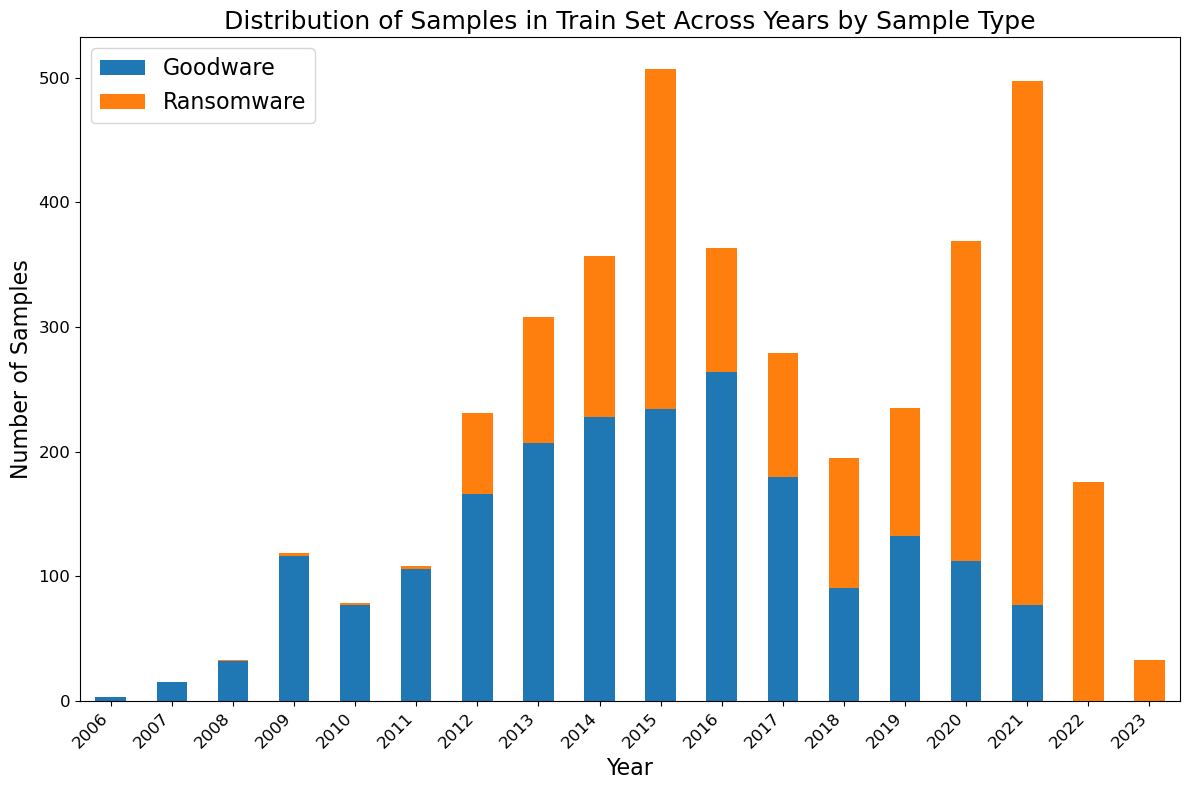

In [54]:
sample_counts_year_cleaned = df_combined_train.groupby(['first_submission_date_year', 'sample_type']).size().unstack(fill_value=0)

# Plotting the stacked bar chart with a custom legend
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the stacked bar chart
sample_counts_year_cleaned.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], ax=ax)

# Adding labels and title
ax.set_title('Distribution of Samples in Train Set Across Years by Sample Type', fontsize=18)
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Number of Samples', fontsize=16)

# Formatting the x-axis ticks
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
ax.tick_params(axis='y', labelsize=12)

# Adding the custom legend
legend_labels = {0: 'Goodware', 1: 'Ransomware'}
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, [legend_labels[int(label)] for label in labels], fontsize=16)

# Display the plot
plt.tight_layout()
plt.show()


In [55]:
# Save the plot as a PDF file
#fig.savefig('ouputs/EDA/trainset_by_type.pdf', format='pdf' ,bbox_inches='tight')

In [56]:
# Concatenate the DataFrames along rows (axis=0)
df_combined_test = pd.concat([test_goodware, test_ransomware_locker, test_ransomware_crypto, test_ransomware_raas, test_ransomware_modern], ignore_index=True)

# Display the shape of the concatenated DataFrame
print("Test Combined Shape: ", df_combined_test.shape)

# Display the first few rows of the concatenated DataFrame
display(df_combined_test.head())


Test Combined Shape:  (977, 19)


,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,source,timestamp,new_timestamp,old_timestamp,Year,first_submission_date,first_submission_date_converted,first_submission_date_year
0,13541,91cf6deb0b743388e7660c0d6bec2fd14037179faee597...,0,goodware,0,goodware,0,3cf63229169189c835093361edd8b14b620f8d6b,1263d85c8e693ab4ea80e7dfaf187ec9,exe,0/76,software_informer_most_popular,1459953544.0,2016-04-06,1459953544.0,2016,1635515164,2021-10-29,2021
1,14058,068bf52c70300eb1f9bba59cbc2aa6815748811722fb03...,0,goodware,0,goodware,0,450d06f59a062792da178ca2325c61d0883cae4a,dabeaca437af7a42fd84f6d609e8e6e2,exe,0/77,software_informer_most_popular,1621624132.0,2021-05-21,1621624132.0,2021,1635623103,2021-10-30,2021
2,13941,d1d6e8b7288c8f9816546498f129f4c5dc91b523c663a4...,0,goodware,0,goodware,0,6b72819dea546d5695f91f24c28154f94b988c1e,de5cb5a6c312e44574b8be097ff8f04d,exe,0/77,software_informer_most_popular,1459953544.0,2016-04-06,1459953544.0,2016,1635860933,2021-11-02,2021
3,13749,2e4adc251768861f2b5405ab0fdabc504c4d3e6a65114a...,0,goodware,0,goodware,0,a476649fec176534cf07b296be081c22ece34588,94d8fb2b9bd8523febb2c5a78dc15c61,exe,0/75,software_informer_most_popular,1596250890.0,2020-08-01,1596250890.0,2020,1635879997,2021-11-02,2021
4,14097,47c78b8c9cbc33a8aba0f23dfde9c9aef2e795d1bc1881...,0,goodware,0,goodware,0,e10c9074de04ad2757b38b6fbaa972322cdbd5af,94d64a91e1b5b3b3c7d0b136aba115ab,msi,0/76,software_informer_most_popular,1636081414.0,2021-11-05,1636081414.0,2021,1636088518,2021-11-05,2021


In [57]:
df_combined_test.sample_type.value_counts()

sample_type
0    510
1    467
Name: count, dtype: int64

In [58]:
df_combined_test.ransomware_type.value_counts()

ransomware_type
goodware    510
crypto      228
raas         94
modern       90
locker       55
Name: count, dtype: int64

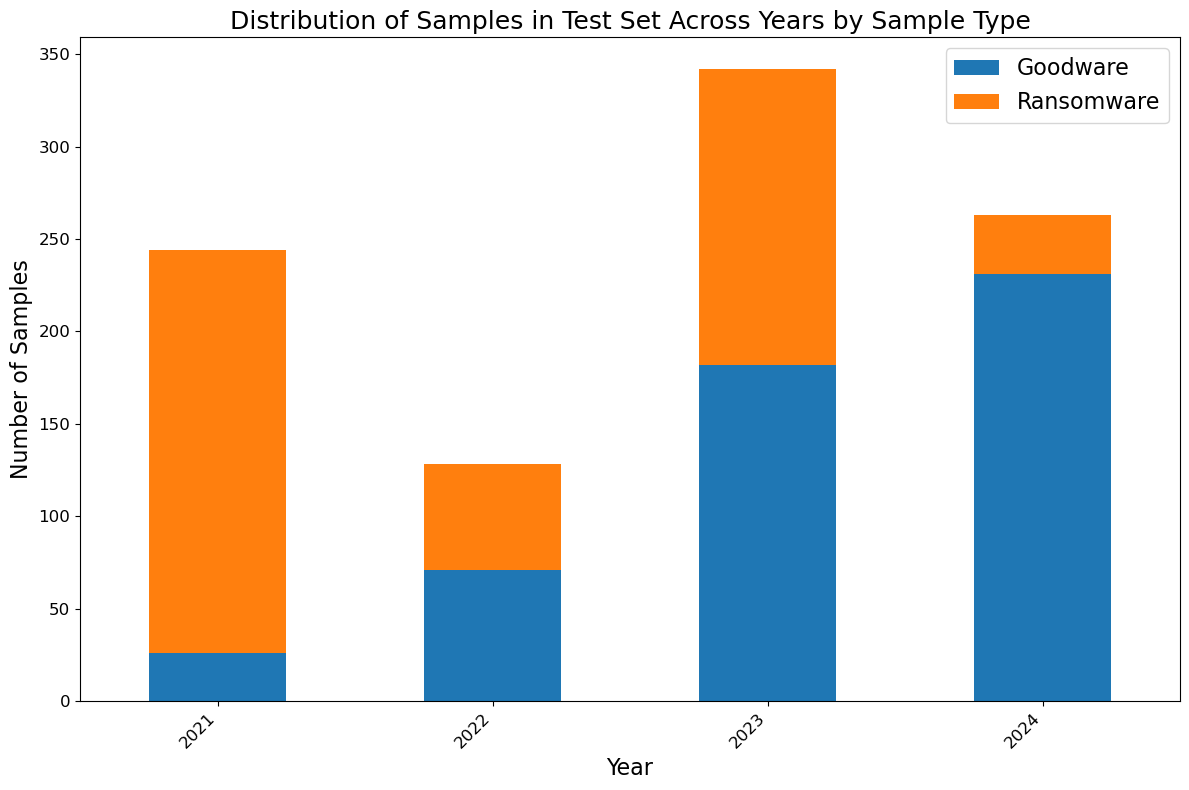

In [59]:
sample_counts_year_cleaned = df_combined_test.groupby(['first_submission_date_year', 'sample_type']).size().unstack(fill_value=0)

# Plotting the stacked bar chart with a custom legend
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the stacked bar chart
sample_counts_year_cleaned.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], ax=ax)

# Adding labels and title
ax.set_title('Distribution of Samples in Test Set Across Years by Sample Type', fontsize=18)
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Number of Samples', fontsize=16)

# Formatting the x-axis ticks
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
ax.tick_params(axis='y', labelsize=12)

# Adding the custom legend
legend_labels = {0: 'Goodware', 1: 'Ransomware'}
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, [legend_labels[int(label)] for label in labels], fontsize=16)

# Display the plot
plt.tight_layout()
plt.show()

In [60]:
# Save the plot as a PDF file
#fig.savefig('ouputs/EDA/testset_by_type.pdf', format='pdf' ,bbox_inches='tight')

In [70]:
test_sampleids = df_combined_test[['sample_id']]
print("Test Sample IDs Shape: ", test_sampleids.shape)
display(test_sampleids.head())
display(test_sampleids.tail())
#test_sampleids.to_csv('FS_MLRan_Datasets/type_test_sampleids.csv', index=False)

Test Sample IDs Shape:  (977, 1)


,sample_id
0,13541
1,14058
2,13941
3,13749
4,14097


,sample_id
972,11762
973,11763
974,12285
975,11747
976,12286
